<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 20px; 
    background: linear-gradient(125deg,rgba(84, 39, 136, 1) 7%, rgba(179, 88, 6, 1) 47%, rgba(253, 184, 99, 1) 85%, rgba(254, 224, 182, 1) 100%); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        🔥 Calorie View | EDA 📊 | CatBoost 😸
    </h1>
</div>


### 📊 **Dataset Description** 📋

This project utilizes **three interrelated datasets** centered on physical activity and calorie expenditure prediction:

#### 🔧 **Train Data**

Contains **750,000 records** and 9 features:
`id`, `Sex` 🧑‍🤝‍🧑, `Age` 🎂, `Height` 📏, `Weight` ⚖️, `Duration` ⏱️, `Heart_Rate` ❤️‍🔥, `Body_Temp` 🌡️, and `Calories` 🔥 (target).

All columns are complete with **no missing values**. This dataset is ideal for training machine learning models due to its rich combination of demographic and physiological indicators linked to calorie burn.

#### 📘 **Original Data**

Sourced from the [Calories Burnt Prediction dataset](https://www.kaggle.com/datasets/ruchikakumbhar/calories-burnt-prediction/data), this auxiliary set includes **15,000 rows** with similar structure:
`User_ID` 🆔, `Gender` 👥, `Age` 🎂, `Height` 📏, `Weight` ⚖️, `Duration` ⏱️, `Heart_Rate` ❤️‍🔥, `Body_Temp` 🌡️, and `Calories` 🔥.

It serves as a **reference dataset** for comparative analysis or enhancing model generalization when merged with the main training data.

#### 🧪 **Test Data**

Contains **250,000 entries** structured identically to the train set but **lacks the target** variable (`Calories` 🔥):
`id`, `Sex` 🧑‍🤝‍🧑, `Age` 🎂, `Height` 📏, `Weight` ⚖️, `Duration` ⏱️, `Heart_Rate` ❤️‍🔥, `Body_Temp` 🌡️.

The objective is to **predict calorie expenditure** for each individual in this test set.

All datasets have consistent formats with **no missing values**, enabling smooth preprocessing and robust supervised regression modeling.

### 🎯 **Project Objectives**

This project aims to develop a **highly accurate regression model** to estimate **calories burned** 🔥 during physical activity based on a range of demographic and physiological features.

**Key Objectives:**

* 📊 **Perform EDA** to uncover feature distributions, correlations, and key patterns related to calorie expenditure.
* 🤖 **Engineer meaningful features** (including cross-terms) to improve model learning capacity and predictive power.
* 🧠 **Train a robust regression model** using **CatBoost**, a gradient boosting algorithm designed to handle categorical features and reduce overfitting.
* ✅ **Evaluate and validate** the model's ability to generalize using **K-Fold cross-validation** and a well-suited error metric.

### 🧠 **Why CatBoost?** 😸

CatBoost is a **high-performance gradient boosting framework** that natively supports **categorical features** and is known for:

* Great **default handling** of categorical variables (like `Sex`)
* **Fast convergence** and **robustness** to overfitting
* Suitability for **tabular data** with limited preprocessing

For this project, CatBoost was configured with carefully selected hyperparameters (tuned using Optuna), including:

* `learning_rate = 0.108`
* `depth = 4`
* `l2_leaf_reg = 7.15`
* `bagging_temperature = 0.41`
* `grow_policy = Depthwise`

Combined with engineered features and log-transformed targets, CatBoost delivers **strong performance** with high interpretability and fast training.

By combining detailed exploratory analysis, thoughtful feature engineering, the **CatBoost regression model**, and the **RMSLE metric**, this project — **🔥 Calorie View | EDA 📊 | CatBoost 😸** — delivers accurate and interpretable predictions, contributing to more intelligent health and fitness analytics. 💪📊



<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Import Libraries</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #542788, #b35806 40%, #fdb863 80%, #fee0b6); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Import Libraries
    </h1>
</div>


In [1]:
import time 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.cm import get_cmap
import matplotlib.gridspec as gridspec
import seaborn as sns
import squarify
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import find_peaks
from scipy.stats import skew
from IPython.display import display

import optuna
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Loading and Initial Exploration</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #542788, #b35806 40%, #fdb863 80%, #fee0b6); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Loading and Initial Exploration
    </h1>
</div>


In [2]:
# Load the datasets
train_data = pd.read_csv('/kaggle/input/playground-series-s5e5/train.csv')
test_data = pd.read_csv('/kaggle/input/playground-series-s5e5/test.csv')
submission = pd.read_csv('/kaggle/input/playground-series-s5e5/sample_submission.csv')
original_data = pd.read_csv('/kaggle/input/calories-burnt-prediction/calories.csv')

# Verify shapes
print("Train Data Shape:", train_data.shape)
print("\nOriginal Data Shape:", original_data.shape)
print("\nTest Data Shape:", test_data.shape)

Train Data Shape: (750000, 9)

Original Data Shape: (15000, 9)

Test Data Shape: (250000, 8)


In [3]:
# Display few rows of each dataset
print("Train Data Preview:")
display(train_data.tail())

print("\nOriginal Data Preview:")
display(original_data.head())

print("\nTest Data Preview:")
display(test_data.head())

Train Data Preview:


id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
749995  749995    male   28   193.0    97.0      30.0       114.0       40.9   
749996  749996  female   64   165.0    63.0      18.0        92.0       40.5   
749997  749997    male   60   162.0    67.0      29.0       113.0       40.9   
749998  749998    male   45   182.0    91.0      17.0       102.0       40.3   
749999  749999  female   39   171.0    65.0      19.0        97.0       40.6   

        Calories  
749995     230.0  
749996      96.0  
749997     221.0  
749998     109.0  
749999     103.0


Original Data Preview:


User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0


Test Data Preview:


id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  750000    male   45   177.0    81.0       7.0        87.0       39.8
1  750001    male   26   200.0    97.0      20.0       101.0       40.5
2  750002  female   29   188.0    85.0      16.0       102.0       40.4
3  750003  female   39   172.0    73.0      20.0       107.0       40.6
4  750004  female   30   173.0    67.0      16.0        94.0       40.5

In [4]:
# Display information about the DataFrames
print("Train Data Info:")
train_data.info()

print("\nOriginal Data Info:")
original_data.info()

print("\nTest Data Info:")
test_data.info()

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB

Original Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height   

In [5]:
# Rename 'Gender' to 'Sex' and 'User_ID' to 'id' in original data for consistency
original_data = original_data.rename(columns={"Gender": "Sex", "User_ID": "id"})


#### **Dataset Overview**

**1. Scale & Composition**
- **Training Data**
  - **Records:** 750,000
  - **Features:** 9 (`id`, `Sex`, `Age`, `Height`, `Weight`, `Duration`, `Heart_Rate`, `Body_Temp`, `Calories`)
  - **Target:** `Calories` (present)
- **Test Data**
  - **Records:** 250,000
  - **Features:** 8 (`id`, `Sex`, `Age`, `Height`, `Weight`, `Duration`, `Heart_Rate`, `Body_Temp`)
  - **Target:** Not included
- **Original Data**
  - **Records:** 15,000
  - **Features:** 9 (`User_ID`, `Sex` (renamed from `Gender`), `Age`, `Height`, `Weight`, `Duration`, `Heart_Rate`, `Body_Temp`, `Calories`)
  - **Target:** `Calories` (present)

**2. Feature Consistency**
- **Column Names**
  - **Training & Test Data:** Use `Sex`
  - **Original Data:** Originally uses `Gender` (renamed to `Sex` for consistency)
  - **All Datasets:** Other features (`Age`, `Height`, `Weight`, `Duration`, `Heart_Rate`, `Body_Temp`, `Calories`) are identically named
- **Index**
  - **Training Data:** Sequential index (0–749,999)
  - **Test Data:** Sequential index (0–249,999)
  - **Original Data:** Non-sequential `User_ID` index

**3. Data Quality Insights**
- **No Missing Values**
  - **All datasets** show **no null values** across features, eliminating the need for imputation.
- **Data Types**
  - **Categorical:** `Sex` (object)
  - **Numeric:** All other features (`int64` or `float64`)
- **Memory Usage**
  - **Training Data:** ~51.5 MB
  - **Test Data:** ~15.3 MB
  - **Original Data:** ~1 MB

In [6]:
def describe_and_style(df, name):
    desc = df.drop(columns=['id'], errors='ignore').describe().T
    print(f"\n{name} Describe:")
    display(desc.style.background_gradient(cmap='PuOr'))

describe_and_style(train_data, "Train Data")
describe_and_style(original_data, "Original Data")
describe_and_style(test_data, "Test Data")



Train Data Describe:



Original Data Describe:



Test Data Describe:


#### **Key Insights from Descriptive Statistics**

#### 1. Age Distribution  
- **Train/Test Data**: Nearly identical distributions (`mean ≈41.4`, `std ≈15.2`), with the 50th percentile at **40 years** for both.  
- **Original Data**: Slightly older average (`mean=42.8`, `std=16.98`), suggesting a minor demographic skew.  

#### 2. Height & Weight  
- **Height**:  
  - **Train/Test**: Mean ≈ **174.7 cm** (nearly identical distributions).  
  - **Original Data**: Similar mean (**174.5 cm**) but higher std (**14.26** vs. **12.82**), indicating more natural variability.  
- **Weight**:  
  - All datasets share identical quartiles (**63-87 kg**), but original data shows higher std (**15.04** vs. **13.98**).  
- **Observation**: Synthetic data replicates original distributions but with smoothed variability.

#### 3. Workout Metrics  
- **Duration**:  
  - All datasets show similar means (**15.4–15.5 mins**) and ranges (**1–30 mins**).  
  - **Original Data**: Median duration is **16 mins** vs. **15 mins** in synthetic data.  
- **Heart Rate**:  
  - Nearly identical across datasets (`mean ≈95.5 BPM`, `std ≈9.5`), confirming realistic simulation.  
- **Body Temperature**:  
  - **Train/Test**: Mean ≈ **40.04°C** (**post-exercise**).  
  - **Original Data**: Slightly lower mean (**40.03°C**) but identical max (**41.5°C**).  
  - **Physiological Context**:  
    - **Normal Resting**: 36.1–37.2°C (values >37.8°C indicate fever).  
    - **Post-Exercise**: Rises to 38–40°C (During intense physical activity, body temperature can rise to 38–40°C and Max values of 41.5°C are extreme but plausible for short high-intensity efforts).  

#### 4. Calories Burned (Target Variable)  
- **Train Data**:  
  - Mean = **88.28**, std = **62.4**, max = **314** calories.  
  - 25th percentile at **34 calories** (light activity), 75th at **136 calories** (moderate-high intensity).  
- **Original Data**:  
  - Nearly identical distribution (`mean=89.54`, `std=62.46`), confirming synthetic data fidelity.  
- **Critical Insight**:  
  - High std (≈62) reflects natural variability tied to `Duration`, `Heart_Rate`, and `Weight`.  
  - The synthetic and original data have identical max values (314 kcal) . The minor mean difference (88.28 vs. 89.54) is likely due to sample size.



#### **Comparative Analysis Table**  
| Feature       | Train Data (Mean) | Original Data (Mean) | Test Data (Mean) | Key Insight                                  |  
|---------------|-------------------|-----------------------|-------------------|----------------------------------------------|  
| Age           | 41.42             | 42.79                 | 41.45             | Original data has marginally older users.    |  
| Heart_Rate    | 95.48             | 95.52                 | 95.48             | Statistically identical.                     |  
| Body_Temp     | 40.04°C           | 40.03°C               | 40.04°C           | **Post-exercise temps** (plausible ranges).  |  
| Calories      | 88.28             | 89.54                 | N/A               | Synthetic data replicates original patterns. |  



**Body Temperature**:  
   - **Physiological Relevance**: Post-exercise temperature correlates with metabolic activity, making it a valid predictor.  


In [7]:
def get_sex_distribution(data, dataset_name):
    count = data['Sex'].value_counts()
    total = count.sum()
    most_frequent = count.idxmax()
    freq = count.max()
    percentage = round(freq / total * 100, 2)

    print(f"{dataset_name}:")
    print(f"  Total Entries: {total}")
    print(f"  Unique Values: {data['Sex'].nunique()}")
    print(f"  Most Frequent: {most_frequent}")
    print(f"  Frequency: {freq}")
    print(f"  Percentage: {percentage}%\n")

get_sex_distribution(train_data, "Train Dataset")
get_sex_distribution(original_data, "Original Dataset")
get_sex_distribution(test_data, "Test Dataset")


Train Dataset:
  Total Entries: 750000
  Unique Values: 2
  Most Frequent: female
  Frequency: 375721
  Percentage: 50.1%

Original Dataset:
  Total Entries: 15000
  Unique Values: 2
  Most Frequent: female
  Frequency: 7553
  Percentage: 50.35%

Test Dataset:
  Total Entries: 250000
  Unique Values: 2
  Most Frequent: female
  Frequency: 125281
  Percentage: 50.11%



#### **Categorical Feature Analysis**

| Dataset          | Total Entries | Unique Values | Most Frequent | Frequency | Percentage |
|------------------|---------------|---------------|---------------|-----------|------------|
| **Train Dataset** | 750,000       | 2 (M/F)       | Female        | 375,721   | 50.1%      |
| **Original Dataset** | 15,000       | 2 (M/F)       | Female        | 7,553     | 50.35%     |
| **Test Dataset**  | 250,000       | 2 (M/F)       | Female        | 125,281   | 50.11%     |

**Key Observations**  
- **Gender Balance**: All datasets show near-perfect 50/50 gender distribution, with females marginally outnumbering males (≤0.5% difference).  
- **Consistency**: Synthetic data perfectly replicates the original dataset's gender proportions, confirming simulation fidelity.  


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Checking Missing & Duplicate Values</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #542788, #b35806 40%, #fdb863 80%, #fee0b6); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Checking Missing & Duplicate Values
    </h1>
</div>


In [8]:
def missing_values_report(df, dataset_name):
    missing_count = df.isnull().sum().sum()
    rows = len(df)
    
    print("=" * 40)
    print(f"{dataset_name} Missing Value Analysis")
    print("=" * 40)
    
    if missing_count == 0:
        print(f"✅ No missing values detected in {rows:,} rows")
    else:
        print(f"⚠️  {missing_count} missing values found in {rows:,} rows")

datasets = {
    "Training Data": train_data,
    "Test Data": test_data,
    "Original Data": original_data
}

for name, data in datasets.items():
    missing_values_report(data, name)
    print()  


Training Data Missing Value Analysis
✅ No missing values detected in 750,000 rows

Test Data Missing Value Analysis
✅ No missing values detected in 250,000 rows

Original Data Missing Value Analysis
✅ No missing values detected in 15,000 rows



In [9]:
def check_duplicates_report(df, dataset_name):
    duplicates_count = df.duplicated().sum()
    total_rows = len(df)
    
    print("=" * 40)
    print(f"🔍 {dataset_name} Duplicate Analysis")
    print("=" * 40)
    
    if duplicates_count == 0:
        print(f"✅ No duplicates found in {total_rows:,} rows")
    else:
        print(f"⚠️  {duplicates_count} duplicates found ({duplicates_count/total_rows:.2%})")
        print(f"    Total rows affected: {duplicates_count:,}/{total_rows:,}")

datasets = {
    "Training Data": train_data,
    "Test Data": test_data,
    "Original Data": original_data
}

duplicate_summary = {}
for name, data in datasets.items():
    check_duplicates_report(data, name)
    duplicate_summary[name] = {
        'duplicates': data.duplicated().sum(),
        'total_rows': len(data)
    }
    print()


🔍 Training Data Duplicate Analysis
✅ No duplicates found in 750,000 rows

🔍 Test Data Duplicate Analysis
✅ No duplicates found in 250,000 rows

🔍 Original Data Duplicate Analysis
✅ No duplicates found in 15,000 rows



#### **Data Quality Insights**

- **No Missing Values:**  
  - **All datasets** (Training, Test, and Original) are **complete**, with **no missing values** in any feature or row.  
  - This means all data is ready for modeling and analysis without the need for imputation or deletion.

- **No Duplicate Entries:**  
  - **No duplicate rows** were found in any of the datasets.  
  - This ensures **data integrity** and prevents potential bias or double-counting of observations.


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Exploratory Data Analysis (EDA)</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #542788, #b35806 40%, #fdb863 80%, #fee0b6); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Exploratory Data Analysis (EDA)
    </h1>
</div>


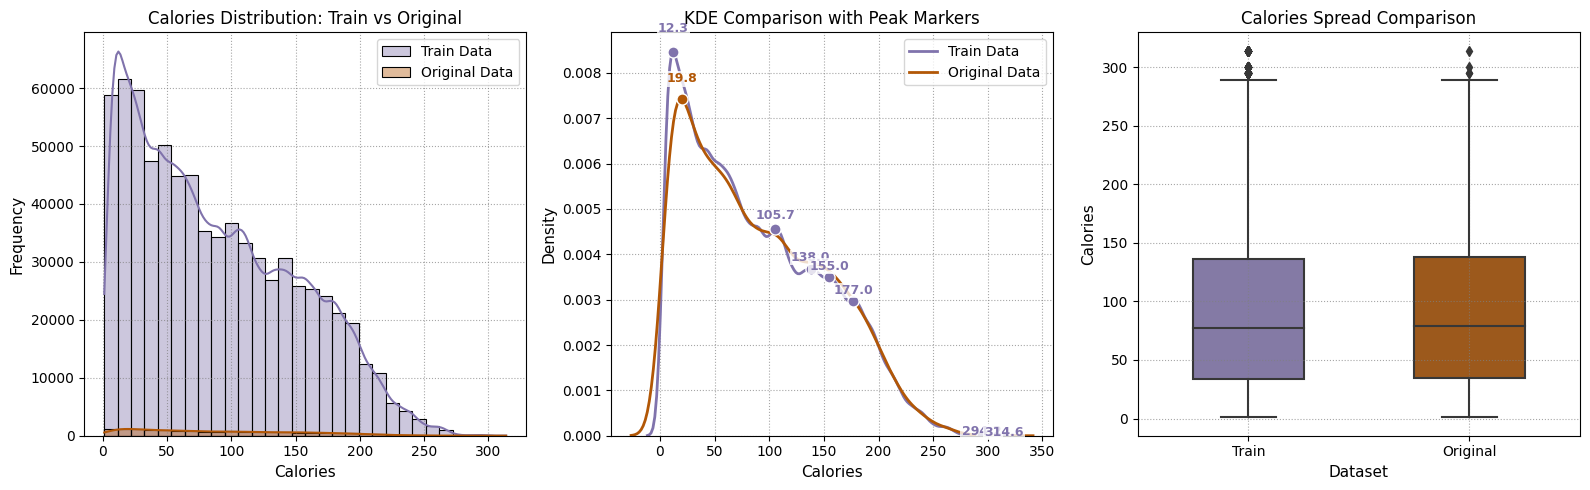

Train Data KDE Peak Points (Calories): [ 12.3 105.7 138.  155.  177.  294.2 314.6]
Original Data KDE Peak Points (Calories): [19.8]


In [10]:
def visualize_calories_distribution(train_data, original_data):
    plt.figure(figsize=(16, 5))
    cmap = cm.get_cmap("PuOr")
    plt.rcParams['font.size'] = 10  

    plt.subplot(1, 3, 1)
    hist_kwargs = {'bins': 30, 'kde': True, 'alpha': 0.4}
    sns.histplot(train_data['Calories'], color=cmap(0.8), label='Train Data', **hist_kwargs)
    sns.histplot(original_data['Calories'], color=cmap(0.1), label='Original Data', **hist_kwargs)
    plt.title('Calories Distribution: Train vs Original', fontsize=12)
    plt.xlabel('Calories', fontsize=11)
    plt.ylabel('Frequency', fontsize=11)
    plt.legend()
    plt.grid(True, color='gray', linestyle=':', alpha=0.7)

    plt.subplot(1, 3, 2)
    train_kde = sns.kdeplot(train_data['Calories'], color=cmap(0.8), linewidth=2, label='Train Data')
    original_kde = sns.kdeplot(original_data['Calories'], color=cmap(0.1), linewidth=2, label='Original Data')
    
    train_line = train_kde.lines[0]
    original_line = original_kde.lines[1]
    x_train, y_train = train_line.get_data()
    x_orig, y_orig = original_line.get_data()
    
    def plot_peaks(x, y, color, label):
        peaks, _ = find_peaks(y)
        for p in peaks:
            plt.plot(x[p], y[p], 'o', color=color, markersize=8, markeredgecolor='white', markeredgewidth=1)
            plt.text(x[p], y[p]*1.05, f'{x[p]:.1f}', color=color, ha='center', fontsize=9, fontweight='bold',
                    bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=1))
        return x[peaks], y[peaks]
    
    train_peaks_x, train_peaks_y = plot_peaks(x_train, y_train, cmap(0.8), 'Train')
    orig_peaks_x, orig_peaks_y = plot_peaks(x_orig, y_orig, cmap(0.1), 'Original')
    
    plt.title('KDE Comparison with Peak Markers', fontsize=12)
    plt.xlabel('Calories', fontsize=11)
    plt.ylabel('Density', fontsize=11)
    plt.legend()
    plt.grid(True, color='gray', linestyle=':', alpha=0.7)

    plt.subplot(1, 3, 3)
    combined = pd.concat([
        train_data[['Calories']].assign(Source='Train'),
        original_data[['Calories']].assign(Source='Original')
    ])
    box = sns.boxplot(x='Source', y='Calories', data=combined, palette=[cmap(0.8), cmap(0.1)], width=0.5, linewidth=1.5)
    for i, artist in enumerate(box.artists):
        artist.set_edgecolor(cmap(0.8 if i==0 else 0.1))
        for j in range(6*i, 6*(i+1)):  
            box.lines[j].set_color(cmap(0.8 if i==0 else 0.1))
    plt.title('Calories Spread Comparison', fontsize=12)
    plt.xlabel('Dataset', fontsize=11)
    plt.ylabel('Calories', fontsize=11)
    plt.grid(True, color='gray', linestyle=':', alpha=0.7)

    plt.tight_layout()
    plt.show()

    print("Train Data KDE Peak Points (Calories):", np.round(train_peaks_x, 1))
    print("Original Data KDE Peak Points (Calories):", np.round(orig_peaks_x, 1))

visualize_calories_distribution(train_data, original_data)


#### **Calories Distribution Insights**

**1. Histogram Comparison**
- **Shape & Spread:**  
  - Both the train and original datasets show a **right-skewed distribution** of calories burned, with the majority of values clustered at the lower end (0–100 kcal).
  - The frequency drops sharply as calories increase, and very few records exceed 200 kcal.
- **Similarity:**  
  - The synthetic train data closely matches the original data in both shape and spread, confirming the fidelity of the generated data.

**2. KDE with Peak Markers**
- **Peak Locations:**  
  - **Train Data Peaks:** Multiple local peaks at approximately **12.3, 105.7, 138, 155, 177, 294.2, and 314.6 kcal**.
  - **Original Data Peaks:** A pronounced peak at **19.8 kcal**.
- **Interpretation:**  
  - The **primary peak** for both datasets is at the lower calorie values, reflecting that most exercise sessions are of lower intensity or duration.
  - The train data shows several smaller peaks at higher calorie values, possibly indicating **synthetic data artifacts** or the presence of common workout patterns at those calorie levels.
  - The original data has a smoother, unimodal distribution, suggesting real-world data is less likely to have these synthetic secondary peaks.
- **Overall Density:**  
  - Both datasets have very similar density curves, but the train data's multiple peaks may indicate overfitting to certain calorie values during data generation.

**3. Boxplot Comparison**
- **Central Tendency & Spread:**  
  - **Medians** are nearly identical, indicating similar central values for calories burned.
  - **IQR (Interquartile Range):** Both datasets have similar spreads, with the middle 50% of values between roughly 30 and 140 kcal.
  - **Outliers:** Both datasets contain high-calorie outliers (up to 314 kcal), which are plausible for longer or more intense workouts.
- **Consistency:**  
  - The boxplots confirm that the synthetic and original datasets are well-aligned in terms of calorie distribution, with only minor differences in variability and outlier frequency.

 
***The calories burned distribution is highly right-skewed and nearly identical across train and original datasets, with most values concentrated at the lower end. The synthetic data is a faithful replica overall, but its multiple KDE peaks suggest some synthetic artifacts or repeated patterns that are less pronounced in the real-world data.***

In [11]:
# Define numerical features to visualize
numerical_features = ['Age' ,'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']

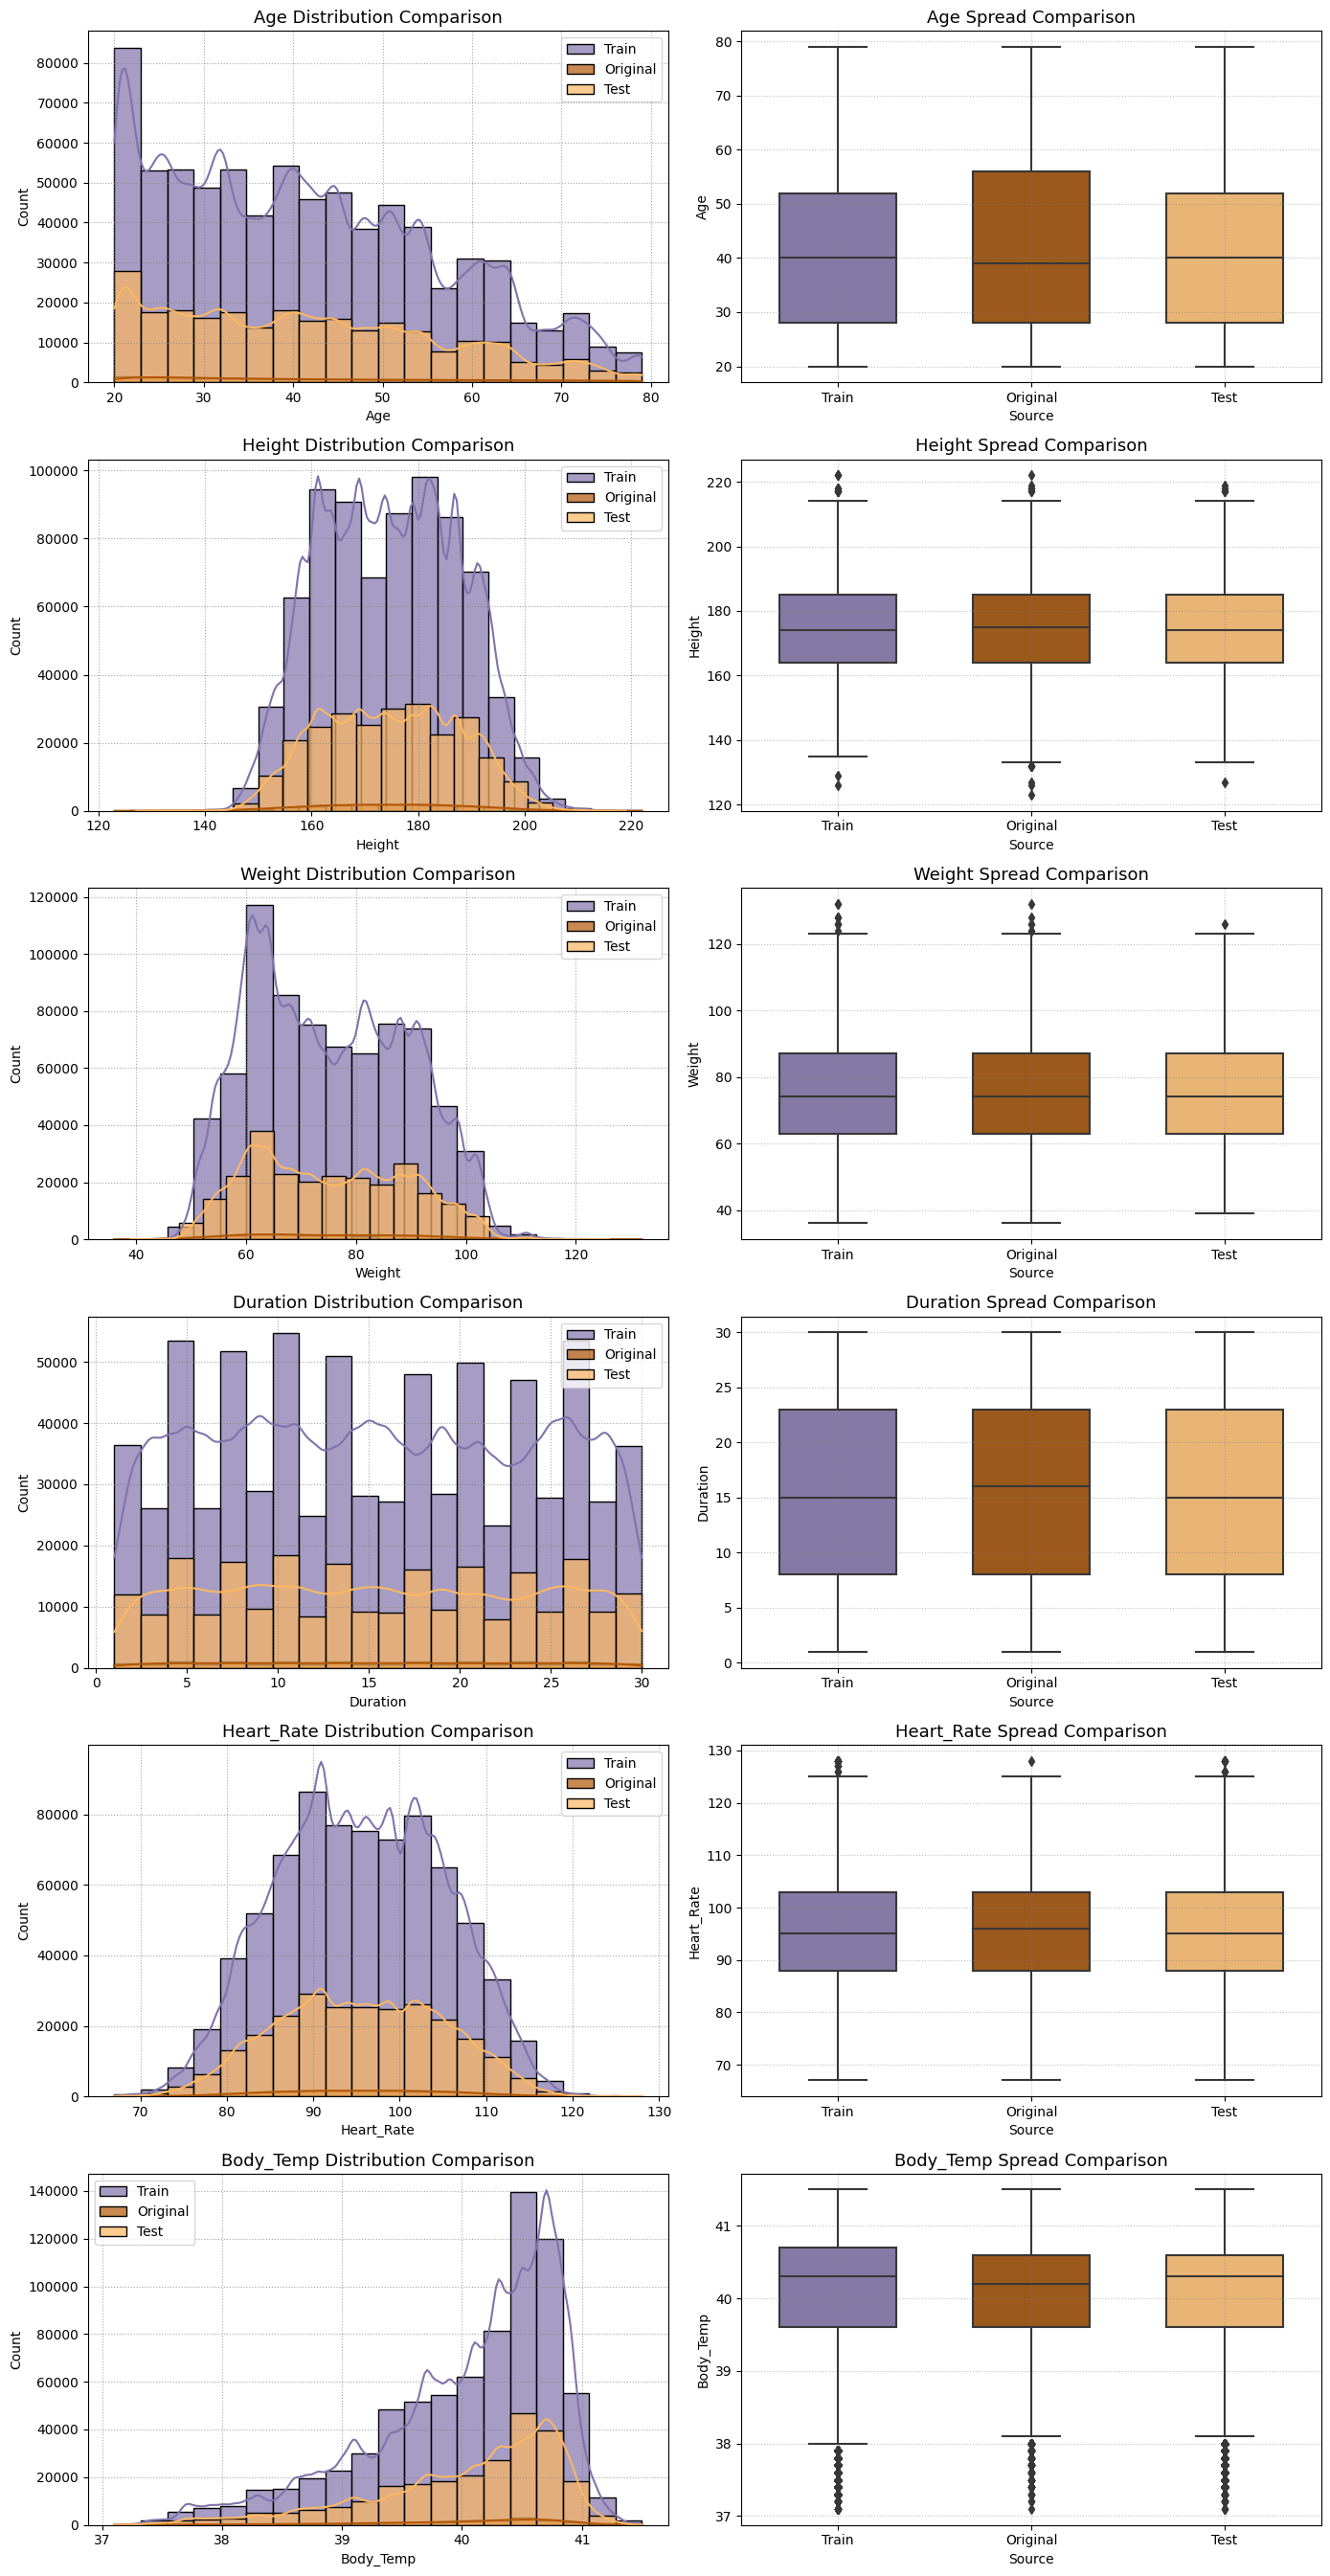

In [12]:
def visualize_numerical_features(train_data, original_data, test_data, features):
    cmap = plt.get_cmap('PuOr')
    dataset_colors = [cmap(0.8), cmap(0.1), cmap(0.3)]
    dataset_names = ['Train', 'Original', 'Test']
    
    fig, axes = plt.subplots(len(features), 2, figsize=(14, len(features)*4.5))
    
    for i, feature in enumerate(features):
        for data, color, label in zip(
            [train_data, original_data, test_data],
            dataset_colors,
            dataset_names
        ):
            sns.histplot(data[feature], color=color, label=label,
                        bins=20, kde=True, alpha=0.7, ax=axes[i,0])
        
        axes[i,0].set_title(f'{feature} Distribution Comparison', fontsize=13)
        axes[i,0].legend()
        axes[i,0].grid(True, color='gray', linestyle=':', alpha=0.7)
        
        combined = pd.concat([
            train_data[[feature]].assign(Source='Train'),
            original_data[[feature]].assign(Source='Original'),
            test_data[[feature]].assign(Source='Test')
        ])
        
        sns.boxplot(x='Source', y=feature, data=combined,
                  palette=dataset_colors, width=0.6, ax=axes[i,1])
        
        axes[i,1].set_title(f'{feature} Spread Comparison', fontsize=13)
        axes[i,1].grid(True, color='gray', linestyle=':', alpha=0.5)
        
        for j, box in enumerate(axes[i,1].artists):
            box.set_edgecolor(dataset_colors[j])
            for k in range(6*j, 6*(j+1)): 
                axes[i,1].lines[k].set_color(dataset_colors[j])

    plt.tight_layout()
    plt.show()


visualize_numerical_features(train_data, original_data, test_data, numerical_features)


#### **Numerical Feature Insights**

**1. Age**
- **Distribution:** All datasets show a right-skewed age distribution, with most users in their 20s and 30s. The train and test datasets closely mirror each other, while the original data has a slightly higher proportion of older users.
- **Spread:** Medians are similar, but the original dataset has a slightly higher median and broader interquartile range, indicating more age diversity.

**2. Height**
- **Distribution:** All datasets display a roughly normal distribution centered around 175 cm. The synthetic (train/test) datasets are slightly more peaked, suggesting less variability than the original.
- **Spread:** The original data has a slightly wider spread and more outliers, indicating greater natural variability.

**3. Weight**
- **Distribution:** Weight is right-skewed in all datasets, with a majority between 60–90 kg. The synthetic datasets show more pronounced peaks, possibly due to data generation artifacts.
- **Spread:** All datasets have similar medians and IQRs, but the original shows more outliers, again reflecting real-world diversity.

**4. Duration**
- **Distribution:** The train and test datasets have a "stepped" pattern, suggesting synthetic binning or rounding, while the original data is smoother. Most sessions last between 5 and 25 minutes.
- **Spread:** Medians and IQRs are nearly identical, but the original data has a slightly higher median.

**5. Heart Rate**
- **Distribution:** All datasets are normally distributed around 95 BPM. The train and test sets are nearly identical, while the original is a bit flatter and wider.
- **Spread:** Very similar across datasets, with the original data showing slightly more high-end outliers.

**6. Body Temperature**
- **Distribution:** All datasets are tightly clustered between 39.5°C and 41°C, consistent with post-exercise readings. The synthetic datasets are slightly more peaked.
- **Spread:** Medians and IQRs are virtually the same, but the original data has more low-end outliers, possibly reflecting more physiological variation.



In [13]:
def check_skewness(data, dataset_name, highlight=True, sort=True):
    skewness_dict = {}
    for feature in data.select_dtypes(include=[np.number]).columns:
        skew = data[feature].skew(skipna=True)
        skewness_dict[feature] = skew

    skew_df = pd.DataFrame.from_dict(skewness_dict, orient='index', columns=['Skewness'])
    if sort:
        skew_df = skew_df.reindex(skew_df['Skewness'].abs().sort_values(ascending=False).index)
    
    print(f"\n🔍 Skewness for {dataset_name}:")
    print("-"*55)
    print(f"{'Feature':<18} | {'Skewness':<10} | {'Remark'}")
    print("-"*55)
    for feature, row in skew_df.iterrows():
        skew = row['Skewness']
        abs_skew = abs(skew)
        if abs_skew > 1:
            remark = "Highly skewed"
            color = '\033[91m'  
        elif abs_skew > 0.5:
            remark = "Moderately skewed"
            color = '\033[93m'  
        else:
            remark = "Approximately symmetric"
            color = ''
        endc = '\033[0m' if color else ''
        if highlight and color:
            print(f"{color}{feature:<18} | {skew:>+9.4f} | {remark}{endc}")
        else:
            print(f"{feature:<18} | {skew:>+9.4f} | {remark}")
    print("-"*55)
    return skew_df

skew_original = check_skewness(original_data, "Original Data")
skew_train = check_skewness(train_data, "Train Data")
skew_test = check_skewness(test_data, "Test Data")



🔍 Skewness for Original Data:
-------------------------------------------------------
Feature            | Skewness   | Remark
-------------------------------------------------------
Body_Temp          |   -0.9944 | Moderately skewed
Calories           |   +0.5054 | Moderately skewed
Age                |   +0.4734 | Approximately symmetric
Weight             |   +0.2267 | Approximately symmetric
Heart_Rate         |   -0.0107 | Approximately symmetric
Height             |   -0.0062 | Approximately symmetric
id                 |   +0.0048 | Approximately symmetric
Duration           |   +0.0048 | Approximately symmetric
-------------------------------------------------------

🔍 Skewness for Train Data:
-------------------------------------------------------
Feature            | Skewness   | Remark
-------------------------------------------------------
Body_Temp          |   -1.0224 | Highly skewed
Calories           |   +0.5392 | Moderately skewed
Age                |   +0.4364 | Appr

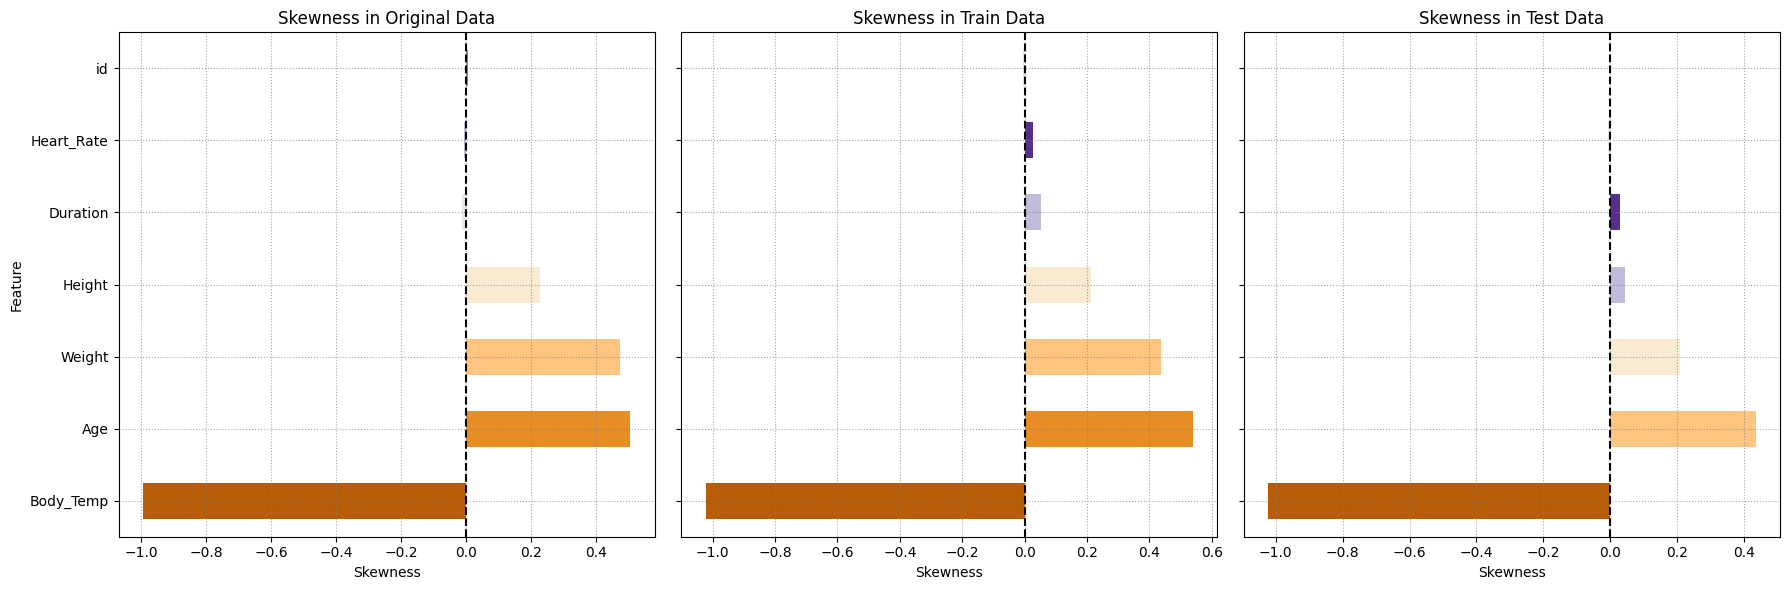

In [14]:
skew_original['Dataset'] = 'Original Data'
skew_train['Dataset'] = 'Train Data'
skew_test['Dataset'] = 'Test Data'

skew_all = pd.concat([skew_original, skew_train, skew_test]).reset_index()
skew_all.rename(columns={'index': 'Feature'}, inplace=True)

features = skew_all['Feature'].unique()
n_features = len(features)
palette_colors = sns.color_palette("PuOr", n_colors=n_features)
feature_color_map = dict(zip(features, palette_colors))

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for ax, dataset_name in zip(axes, ['Original Data', 'Train Data', 'Test Data']):
    df = skew_all[skew_all['Dataset'] == dataset_name]
    colors = df['Feature'].map(feature_color_map)
    df.plot.barh(x='Feature', y='Skewness', ax=ax, color=colors, legend=False)
    ax.axvline(0, color='black', linestyle='--')
    ax.set_title(f"Skewness in {dataset_name}")
    ax.set_xlabel("Skewness")
    ax.grid(True, color='gray', linestyle=':', alpha=0.7)

plt.tight_layout()
plt.show()


#### **Skewness Insights**

**1. Body Temperature (Body_Temp)** 
- **Train/Test:** Highly negatively skewed (`≈ -1.02`), indicating a long left tail.
- **Original:** Moderately negatively skewed (`≈ -0.99`).
- **Negative skewness** means most values are clustered on the higher side (closer to the maximum), with fewer lower values dragging the tail to the left.
- This is common for physiological metrics like body temperature after exercise, where most people’s temperatures rise within a narrow band, but some may not increase as much.
- The distribution is not symmetric, and there are more extreme low values than high ones, but these are rare.

**2. Calories**
- **Train/Original:** Moderately positively skewed (`≈ +0.5`).
- **Positive skewness** means most values are clustered on the lower side, with a long right tail of higher values.
- This is typical for calorie burn, where most workouts result in lower calorie expenditure, but a few sessions (longer or more intense) result in much higher values.
- The right tail (higher calorie burns) may contain outliers or special cases, which could be important for analysis.

**3. Age, Weight, Height, Duration, Heart Rate**
- **All datasets:** Skewness values are close to zero (`-0.5 < skewness < +0.5`), indicating approximately symmetric distributions.
- **Symmetric distributions** mean the data is balanced around the mean, with tails on both sides being roughly equal in length.
- For features like age, height, and weight, this suggests a relatively even spread of values without strong bias toward high or low extremes.

***The skewness analysis confirms that most features are well-behaved and symmetric, with only Body_Temp and Calories showing notable skewness. This insight guides appropriate data preprocessing and model selection for datasets.***


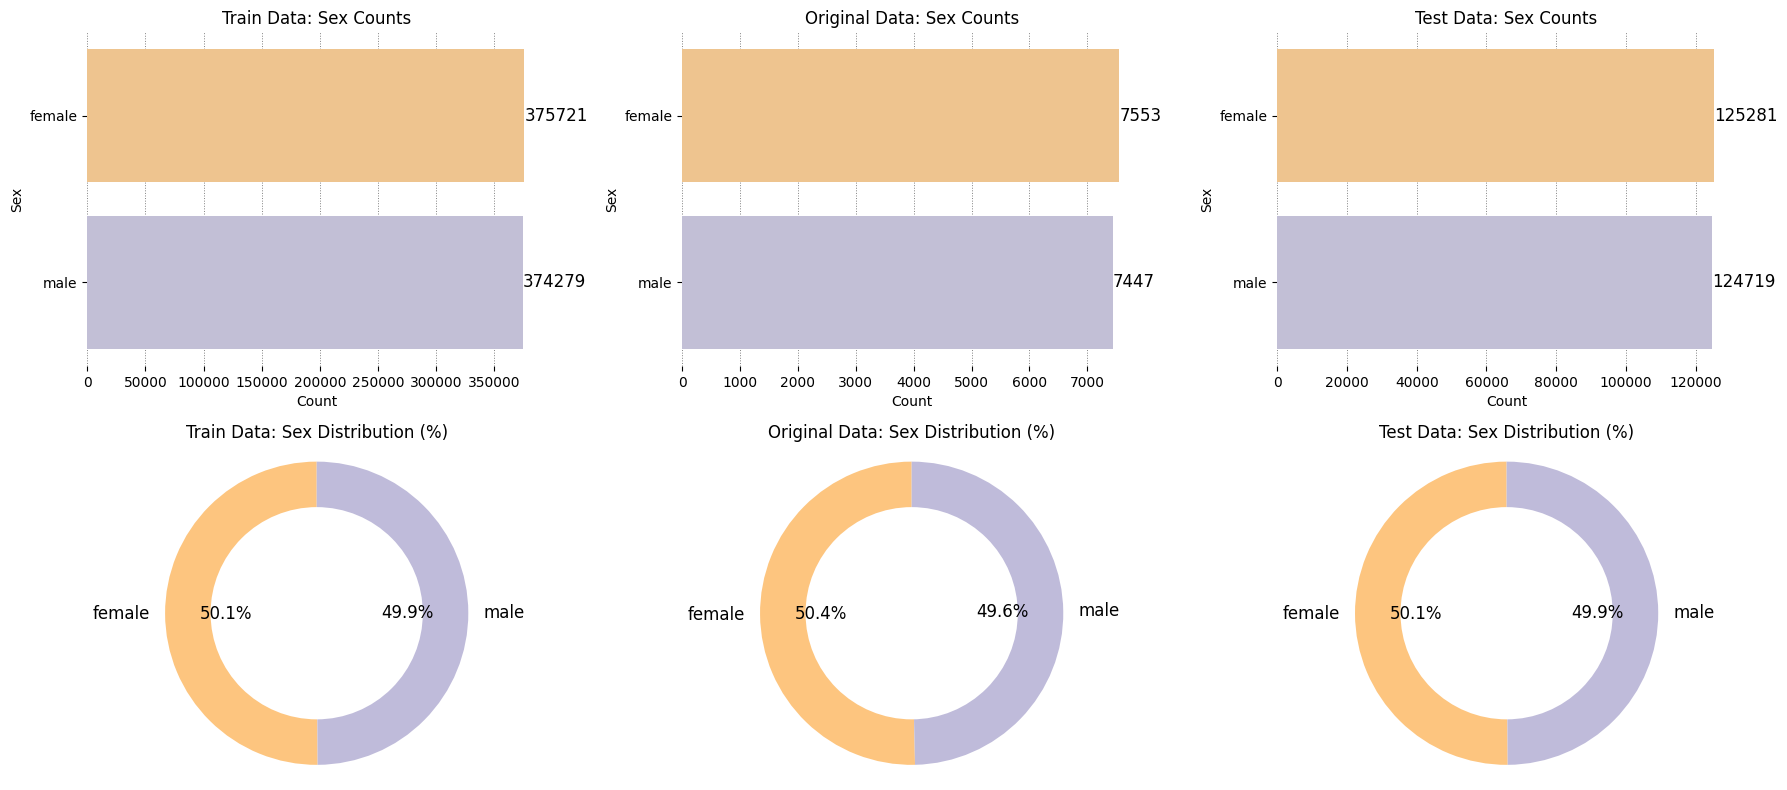

In [15]:
def plot_sex_distribution_across_datasets(train_data, original_data, test_data):
    custom_palette = sns.color_palette("PuOr", 2)
    dataset_names = ['Train', 'Original', 'Test']
    datasets = [train_data, original_data, test_data]

    fig, axes = plt.subplots(2, 3, figsize=(18, 8))

    for i, (data, name) in enumerate(zip(datasets, dataset_names)):
        order = data['Sex'].value_counts().index
        sns.countplot(y='Sex', data=data, ax=axes[0, i], palette=custom_palette, order=order)
        axes[0, i].set_title(f'{name} Data: Sex Counts')
        axes[0, i].set_xlabel('Count')
        axes[0, i].set_ylabel('Sex')
        for p in axes[0, i].patches:
            axes[0, i].annotate(f'{int(p.get_width())}', 
                                (p.get_width(), p.get_y() + p.get_height() / 2), 
                                ha='left', va='center', 
                                color='black', fontsize=12)
        axes[0, i].set_axisbelow(True)
        axes[0, i].grid(axis='x', color='gray', linestyle=':', linewidth=0.7)
        sns.despine(left=True, bottom=True, ax=axes[0, i])

    for i, (data, name) in enumerate(zip(datasets, dataset_names)):
        sex_counts = data['Sex'].value_counts()
        wedges, texts, autotexts = axes[1, i].pie(
            sex_counts, 
            labels=sex_counts.index, 
            autopct='%1.1f%%', 
            startangle=90,
            colors=custom_palette,
            textprops={'fontsize': 12}
        )
        centre_circle = plt.Circle((0, 0), 0.70, fc='white')
        axes[1, i].add_artist(centre_circle)
        axes[1, i].set_title(f'{name} Data: Sex Distribution (%)')
        axes[1, i].axis('equal')  

    plt.tight_layout()
    plt.show()


plot_sex_distribution_across_datasets(train_data, original_data, test_data)


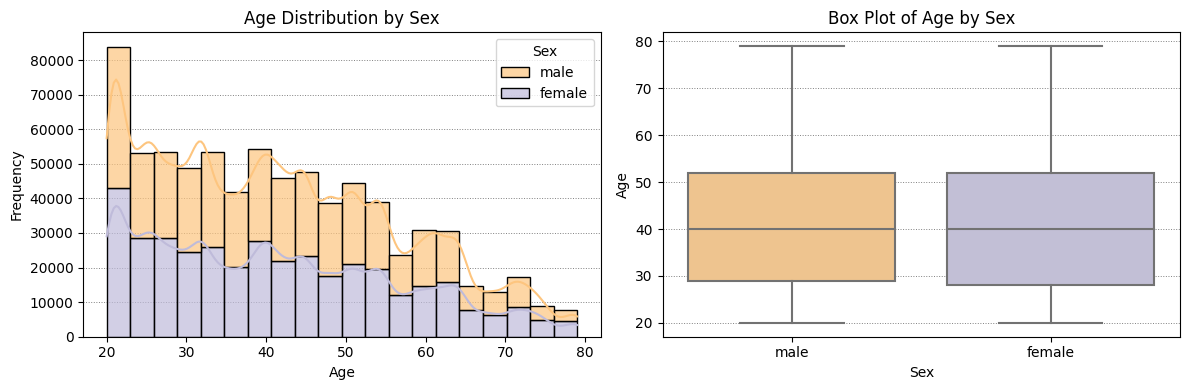

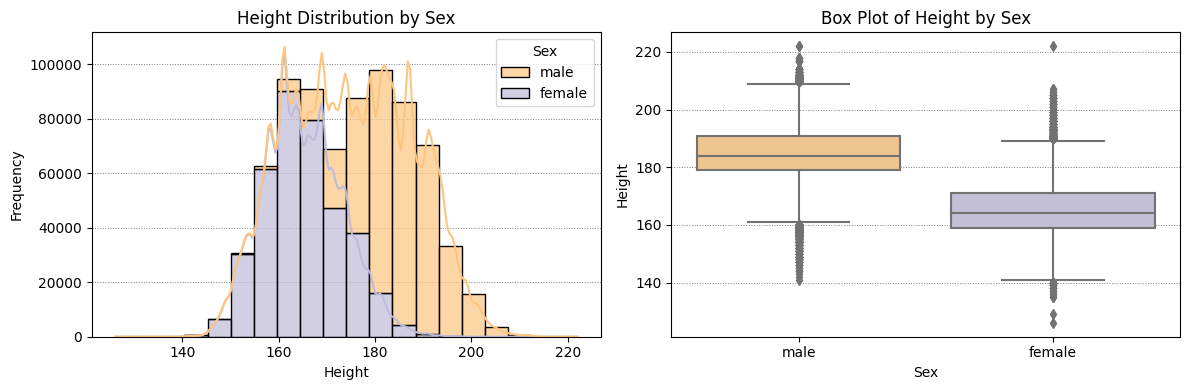

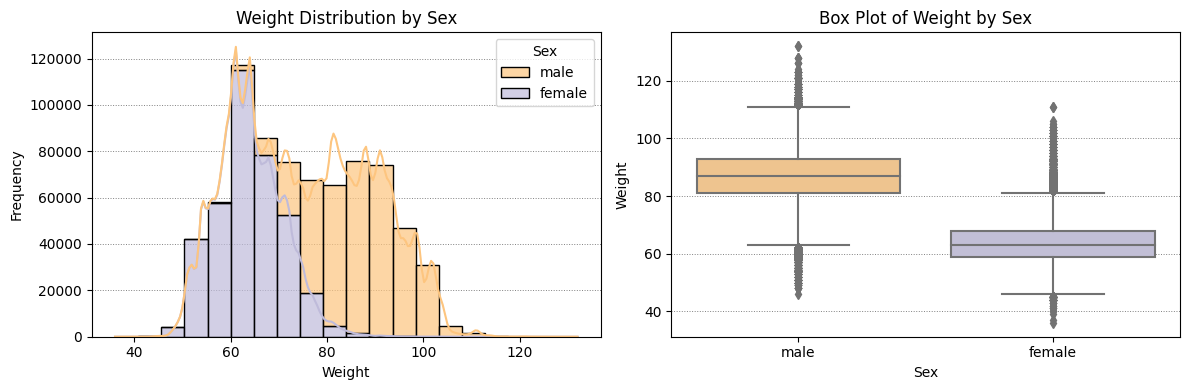

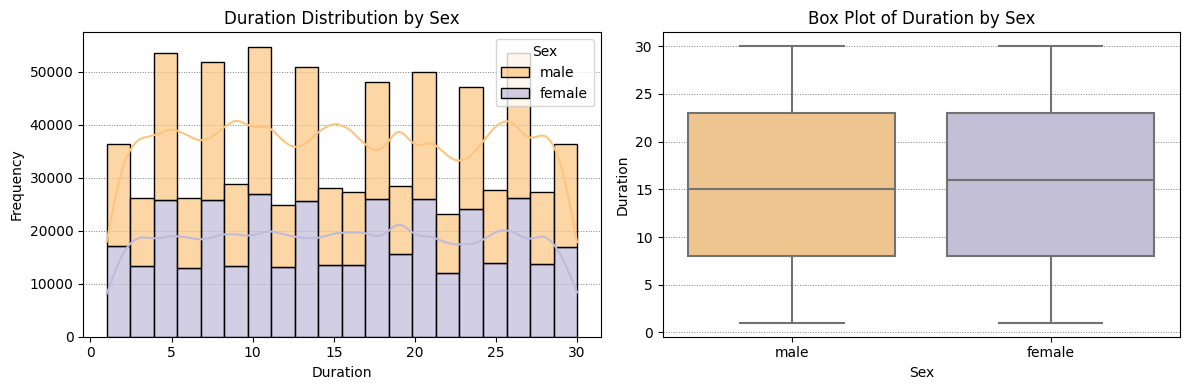

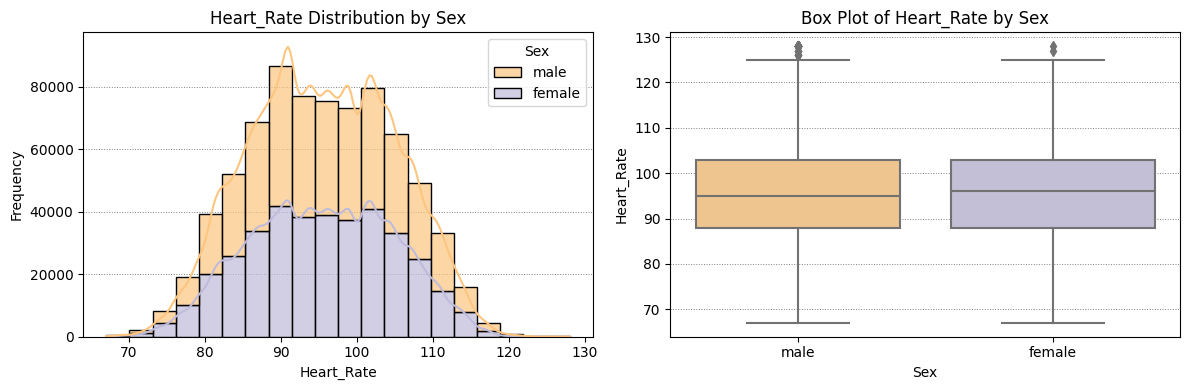

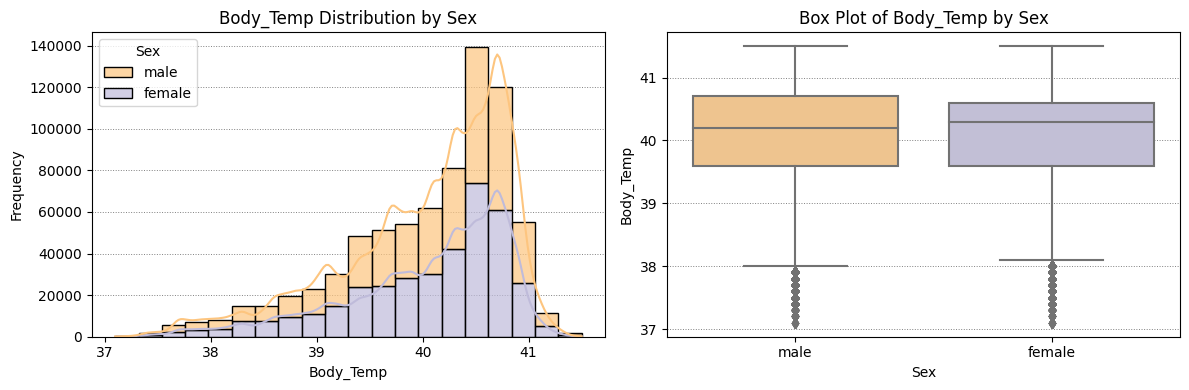

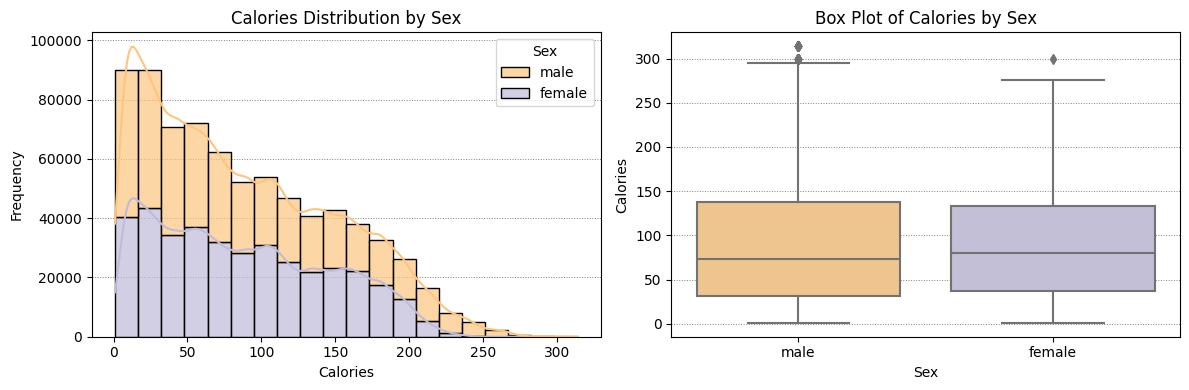

In [16]:
numerical_features = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']
custom_palette = sns.color_palette("PuOr", 2)

def plot_numerical_by_sex(train_data, features, palette):
    for feature in features:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))

        sns.histplot(
            data=train_data, x=feature, hue='Sex', multiple='stack',
            bins=20, palette=palette, ax=axes[0], kde=True, alpha=0.7
        )
        axes[0].set_title(f'{feature} Distribution by Sex')
        axes[0].set_xlabel(feature)
        axes[0].set_ylabel('Frequency')
        axes[0].set_axisbelow(True)
        axes[0].grid(axis='y', color='gray', linestyle=':', linewidth=0.7)

        sns.boxplot(
            x='Sex', y=feature, data=train_data, palette=palette, ax=axes[1]
        )
        axes[1].set_title(f'Box Plot of {feature} by Sex')
        axes[1].set_xlabel('Sex')
        axes[1].set_ylabel(feature)
        axes[1].set_axisbelow(True)
        axes[1].grid(axis='y', color='gray', linestyle=':', linewidth=0.7)
        plt.tight_layout()
        plt.show()

plot_numerical_by_sex(train_data, numerical_features, custom_palette)


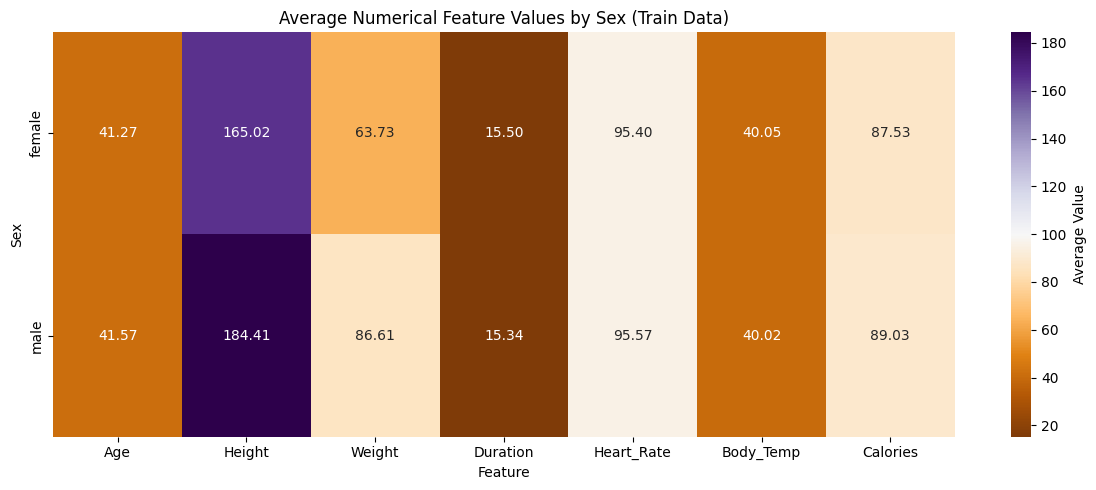

In [17]:
avg_by_sex = train_data.groupby('Sex')[numerical_features].mean().round(2)
# print(avg_by_sex)

plt.figure(figsize=(12, 5))
sns.heatmap(avg_by_sex, annot=True, cmap='PuOr', fmt='.2f', cbar_kws={'label': 'Average Value'})
plt.title('Average Numerical Feature Values by Sex (Train Data)')
plt.ylabel('Sex')
plt.xlabel('Feature')
plt.tight_layout()
plt.show()


#### **Average Numerical Feature Values by Sex (Train Data)**

#### Summary Table

| Feature      | Female | Male   | Key Insight                         |
|--------------|--------|--------|-------------------------------------|
| Age          | 41.27  | 41.57  | Age distribution is balanced        |
| Height (cm)  | 165.02 | 184.41 | Males are significantly taller      |
| Weight (kg)  | 63.73  | 86.61  | Males are significantly heavier     |
| Duration (min)| 15.50 | 15.34  | Similar workout durations           |
| Heart Rate   | 95.40  | 95.57  | Similar heart rate response         |
| Body Temp (°C)| 40.05 | 40.02  | Similar body temperature response   |
| Calories     | 87.53  | 89.03  | Males burn slightly more calories   |


- **Physical characteristics (height and weight)** differ markedly between sexes, as expected.
- **Workout behavior and physiological responses** (duration, heart rate, body temperature, calories burned) are remarkably similar, with only a slight increase in calories burned for males.


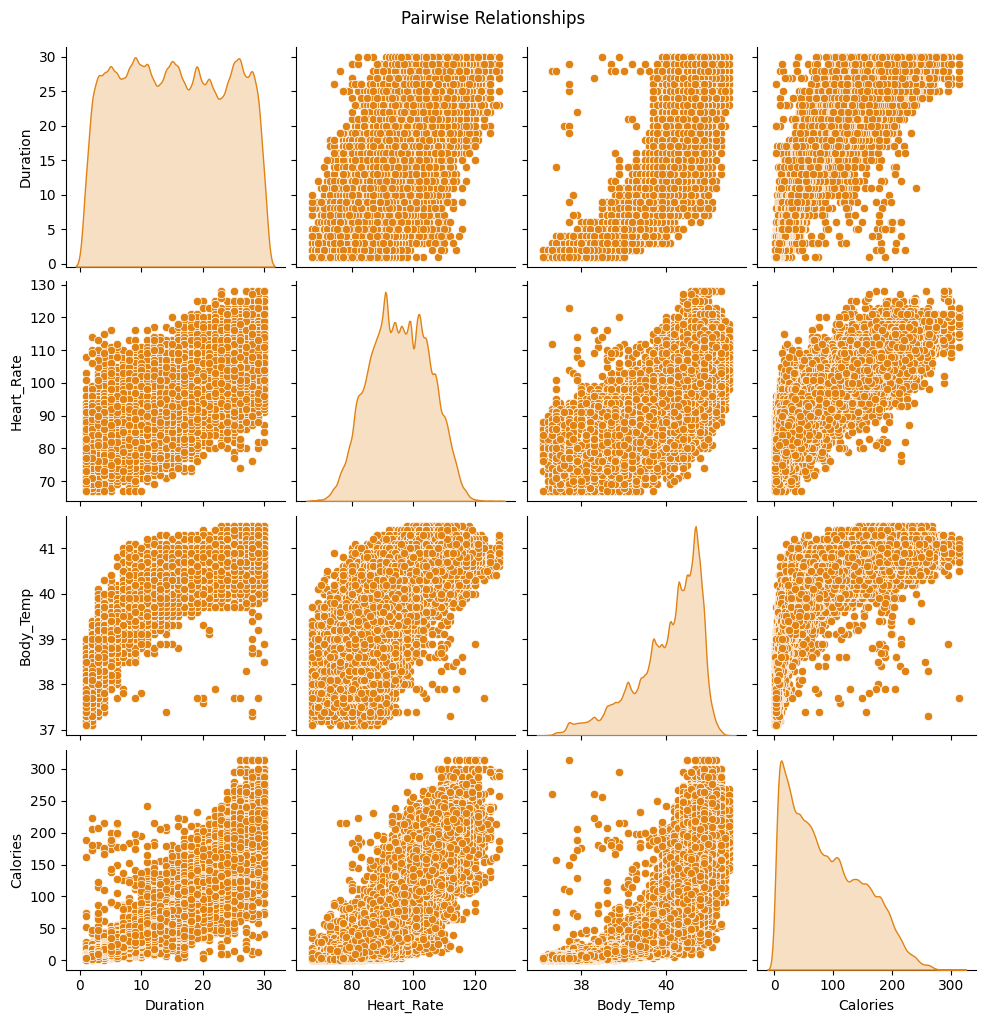

In [18]:
colors = sns.color_palette("PuOr", n_colors=4)  
sns.pairplot(train_data,
             vars=['Duration', 'Heart_Rate', 'Body_Temp', 'Calories'],
             kind='scatter',
             diag_kind='kde',
             plot_kws={'color': colors[0]},
             diag_kws={'color': colors[0]})
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()


#### **Insights from Pairplot: Pairwise Relationships**

#### Strong Positive Relationships with Calories
- **Duration vs. Calories:**  
  The scatter plots show a clear, strong positive relationship: as workout duration increases, calories burned also increase. This is expected, as longer workouts generally expend more energy.
- **Heart Rate vs. Calories:**  
  There is a strong positive association between average heart rate during exercise and calories burned. Higher heart rates typically indicate higher intensity, leading to greater calorie expenditure.
- **Body Temp vs. Calories:**  
  An upward trend is also visible here: higher body temperatures post-exercise are associated with higher calories burned, reflecting increased metabolic activity during intense workouts.

#### Interrelationships Among Physiological Features
- **Duration, Heart Rate, and Body Temp:**  
  These features are also positively correlated with each other. Longer workouts tend to result in higher heart rates and higher body temperatures, indicating that intensity and duration together drive physiological responses.
- **Heart Rate vs. Body Temp:**  
  There is a clear positive pattern, suggesting that as heart rate increases, body temperature also tends to rise, which is consistent with exercise physiology.

#### Summary Table of Relationships

| Feature Pair           | Relationship Type      | Insight                                                        |
|------------------------|-----------------------|----------------------------------------------------------------|
| Duration vs. Calories  | Strong Positive       | Longer workouts burn more calories                             |
| Heart Rate vs. Calories| Strong Positive       | Higher heart rate = more calories burned                       |
| Body Temp vs. Calories | Strong Positive       | Higher body temp = more calories burned                        |
| Duration vs. Heart Rate| Strong Positive       | Longer duration = higher heart rate                            |
| Duration vs. Body Temp | Strong Positive       | Longer duration = higher body temp                             |
| Heart Rate vs. Body Temp| Strong Positive      | Higher heart rate = higher body temp                           |



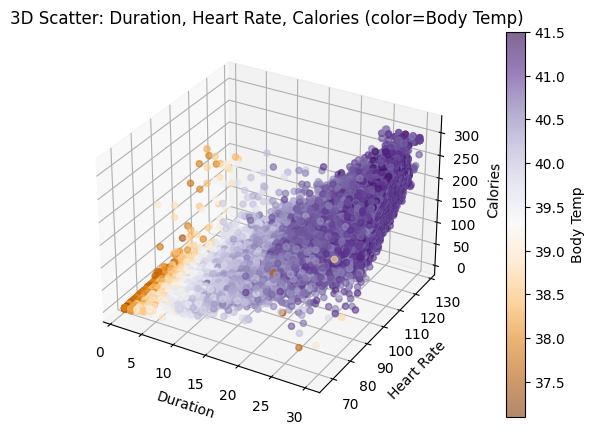

In [19]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(train_data['Duration'], train_data['Heart_Rate'], train_data['Calories'],
                c=train_data['Body_Temp'], cmap='PuOr', alpha=0.6)
fig.colorbar(sc, ax=ax, label='Body Temp')
ax.set_xlabel('Duration')
ax.set_ylabel('Heart Rate')
ax.set_zlabel('Calories')
plt.title('3D Scatter: Duration, Heart Rate, Calories (color=Body Temp)')
plt.show()


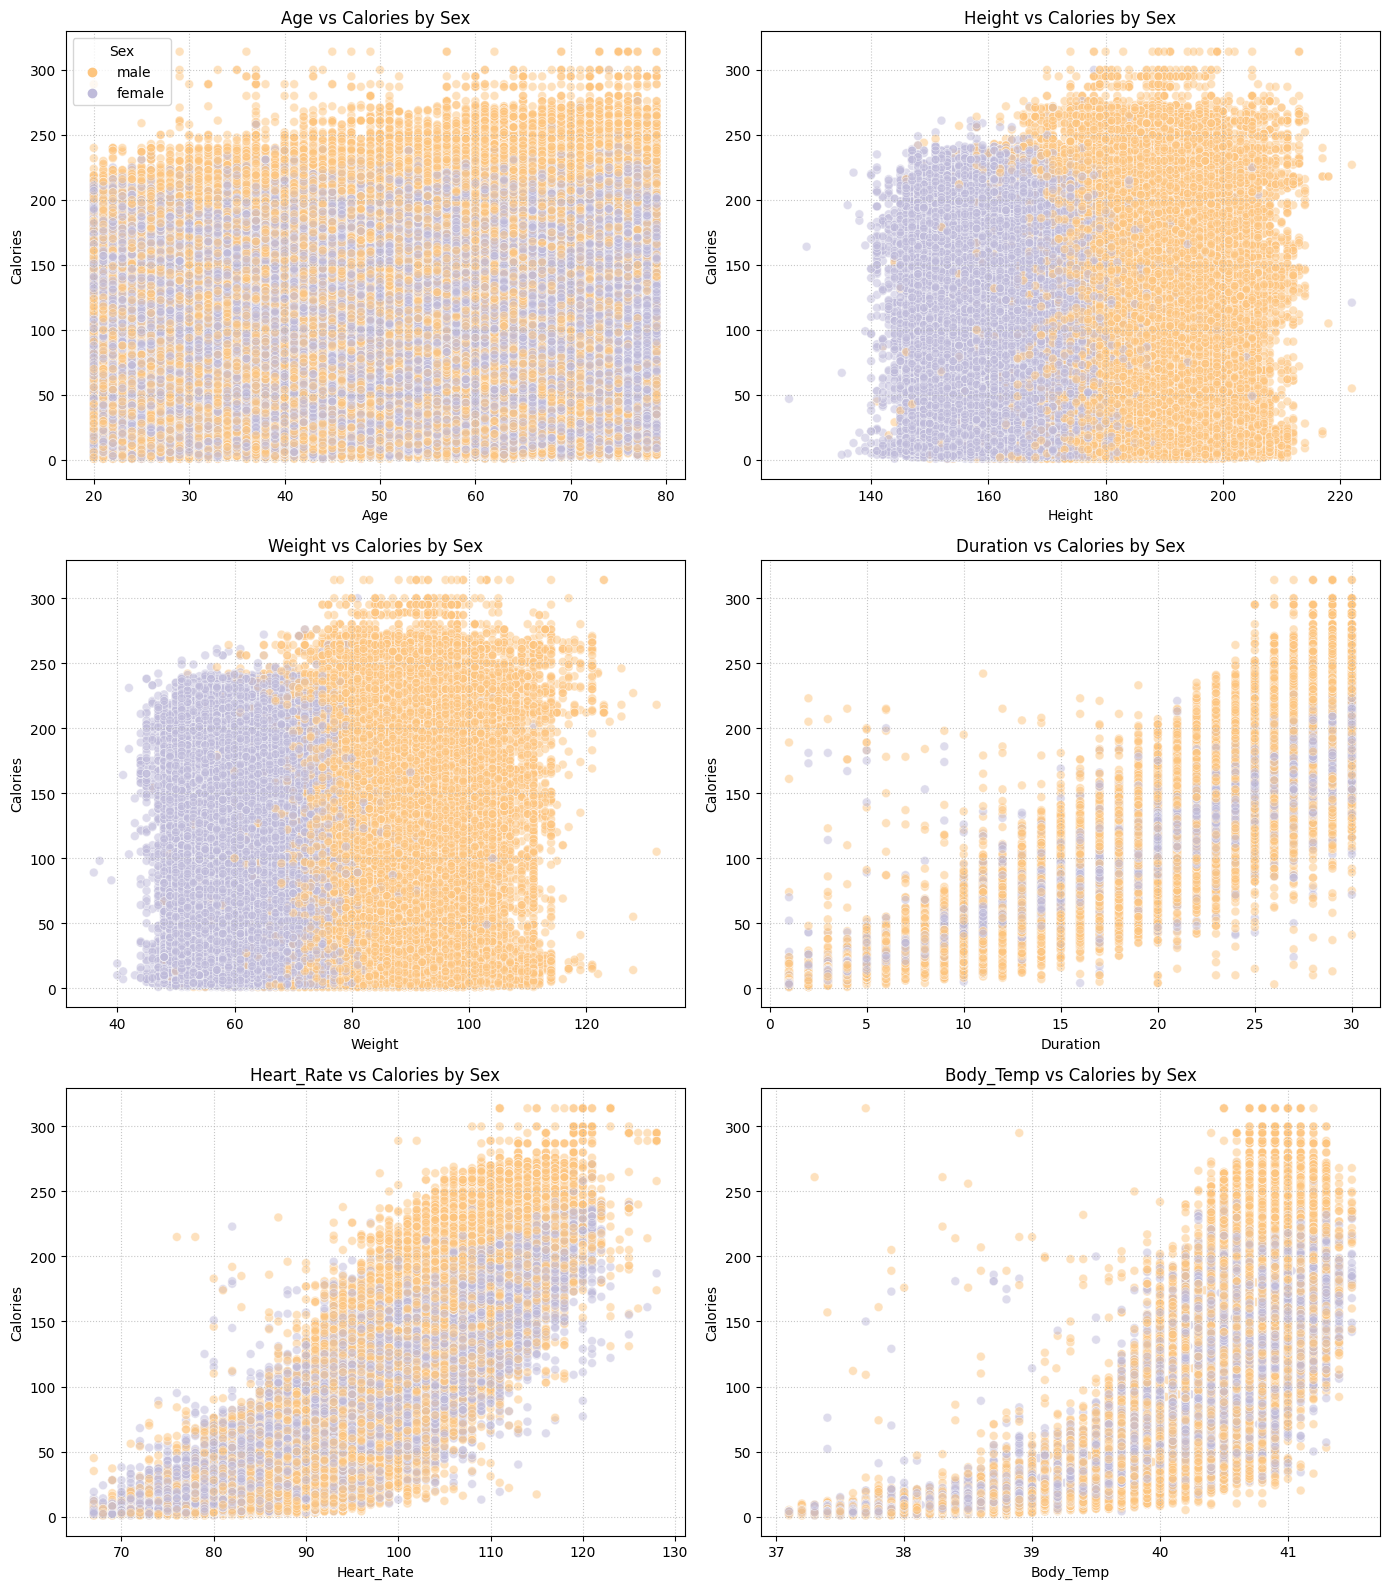

In [20]:
numerical_features = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']
custom_palette = sns.color_palette("PuOr", 2)

def scatter_features_vs_calories_by_sex_subplot(train_data, features, palette):
    n_features = len(features)
    n_cols = 2
    n_rows = (n_features + 1) // n_cols  

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 16))
    axes = axes.flatten()

    for idx, feature in enumerate(features):
        ax = axes[idx]
        sns.scatterplot(
            data=train_data,
            x=feature,
            y='Calories',
            hue='Sex',
            palette=palette,
            alpha=0.5,
            edgecolor='w',
            s=40,
            ax=ax
        )
        ax.set_title(f'{feature} vs Calories by Sex')
        ax.set_xlabel(feature)
        ax.set_ylabel('Calories')
        ax.grid(axis='both', linestyle=':', alpha=0.7)
        if idx == 0:
            ax.legend(title='Sex')
        else:
            ax.get_legend().remove()

    for idx in range(len(features), n_rows * n_cols):
        fig.delaxes(axes[idx])

    plt.tight_layout()
    plt.show()

scatter_features_vs_calories_by_sex_subplot(train_data, numerical_features, custom_palette)


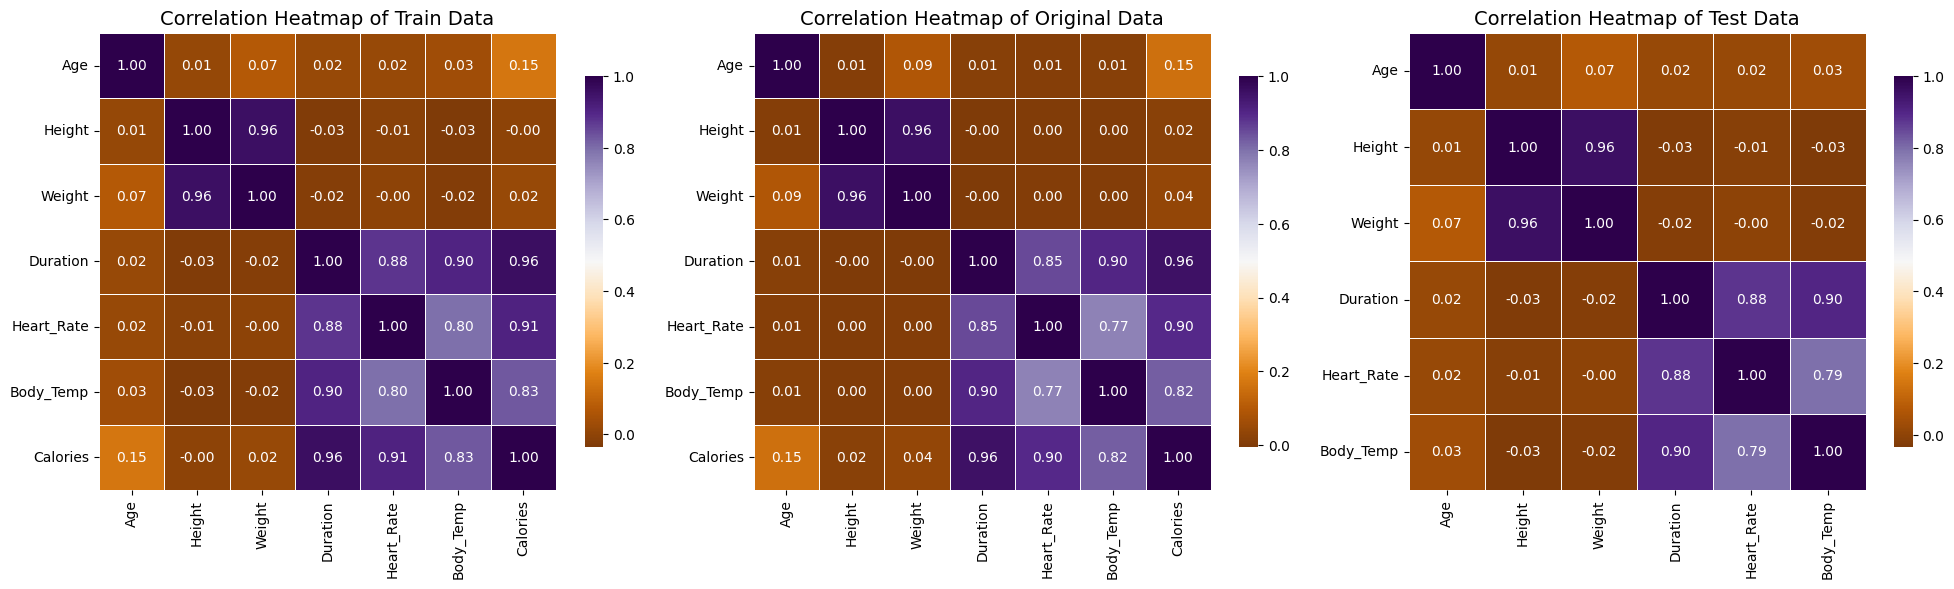

In [21]:
all_features = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']
test_features = [f for f in all_features if f in test_data.columns]

datasets = {
    "Train Data": train_data,
    "Original Data": original_data,
    "Test Data": test_data
}

fig, axes = plt.subplots(ncols=3, figsize=(20, 6))  
axs = axes.ravel() 

for i, (name, df) in enumerate(datasets.items()):
    available_features = [f for f in all_features if f in df.columns]
    df_subset = df[available_features]
    corr = df_subset.corr()
    
    sns.heatmap(
        corr,
        annot=True,
        fmt=".2f",
        cmap="PuOr",
        linewidths=0.5,
        square=True,
        cbar_kws={"shrink": .7},
        ax=axs[i]
    )
    axs[i].set_title(f'Correlation Heatmap of {name}', fontsize=14)

plt.tight_layout()
plt.show()


#### **General Interpretation of Correlation Values**

- **1.0:** Perfect positive correlation (variable with itself).
- **0.9–1.0 / -0.9–-1.0:** Very strong (positive/negative) correlation.
- **0.7–0.9 / -0.7–-0.9:** Strong correlation.
- **0.5–0.7 / -0.5–-0.7:** Moderate correlation.
- **0.1–0.5 / -0.1–-0.5:** Weak correlation.
- **0.0–0.1 / -0.1–0.0:** No or negligible correlation.

#### Descriptive Insights for Train Data

- **Height vs. Weight:**  
  - **Correlation: 0.96**  
  - **Interpretation:** Extremely strong positive linear relationship. As height increases, weight also increases significantly.
- **Duration, Heart_Rate, Body_Temp, and Calories:**  
  - **Duration vs. Heart_Rate:** 0.88  
  - **Duration vs. Body_Temp:** 0.90  
  - **Duration vs. Calories:** 0.96  
  - **Heart_Rate vs. Calories:** 0.91  
  - **Body_Temp vs. Calories:** 0.83  
  - **Interpretation:** Very strong positive correlations. Longer workouts are associated with higher heart rates, higher body temperatures, and significantly higher calorie burn.
- **Age, Height, Weight with other features:**  
  - **Correlations close to zero** (e.g., Age vs. Calories: 0.15, Height/Weight vs. Calories: near zero).
  - **Interpretation:** Little to no meaningful linear relationship. Age, height, and weight do not strongly predict calorie burn or other workout metrics in this dataset.


#### Summary Table

| Feature Pair                | Train Data | Original Data | Test Data | Interpretation                        |
|-----------------------------|------------|---------------|-----------|---------------------------------------|
| Height vs. Weight           | 0.96       | 0.96          | 0.96      | Extremely strong positive correlation |
| Duration vs. Heart_Rate     | 0.88       | 0.85          | 0.88      | Very strong positive correlation      |
| Duration vs. Body_Temp      | 0.90       | 0.90          | 0.90      | Very strong positive correlation      |
| Heart_Rate vs. Body_Temp    | 0.80       | 0.77          | 0.79      | Strong positive correlation           |
| Duration vs. Calories       | 0.96       | 0.96          | —         | Extremely strong positive correlation |
| Heart_Rate vs. Calories     | 0.91       | 0.90          | —         | Very strong positive correlation      |
| Body_Temp vs. Calories      | 0.83       | 0.82          | —         | Strong positive correlation           |
| Age/Height/Weight vs. Others| ~0.0–0.15  | ~0.0–0.15     | ~0.0–0.07 | Negligible correlation                |

#### Key Insights

- **Height and Weight** are almost perfectly correlated in all datasets, indicating that taller individuals tend to be heavier.
- **Duration, Heart Rate, Body Temperature, and Calories** (where available) are very strongly positively correlated. This suggests that longer or more intense workouts lead to higher physiological responses and greater calorie expenditure.
- **Age, Height, and Weight** show negligible correlation with workout outcomes (duration, heart rate, body temperature, calories), meaning they are not strong predictors in this context.


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preprocessing</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #542788, #b35806 40%, #fdb863 80%, #fee0b6); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Preprocessing
    </h1>
</div>


## Combine Datasets

In [22]:
# Concatenate train_data and original_data
combined_data = pd.concat([train_data, original_data], ignore_index=True)

print(f"Combined dataset shape: {combined_data.shape}")

Combined dataset shape: (765000, 9)


## Feature Engineering

In [23]:
numerical_features = ["Age", "Height", "Weight", "Duration", "Heart_Rate", "Body_Temp"]

def add_cross_terms(df, features):
    df = df.copy()
    for i in range(len(features)):
        for j in range(i + 1, len(features)):
            col_name = f"{features[i]}_x_{features[j]}"
            df[col_name] = df[features[i]] * df[features[j]]
    return df

combined_data = add_cross_terms(combined_data, numerical_features)
test_data = add_cross_terms(test_data, numerical_features)

* Creating cross-term features (pairwise products of numerical variables) allows the model to capture complex interactions between physiological and activity-related factors. For example, the effect of heart rate on calorie burn may depend on workout duration or body weight. These engineered features enrich the input space and can significantly enhance model accuracy.


## Label Encoding

In [24]:
le = LabelEncoder()
combined_data['Sex'] = le.fit_transform(combined_data['Sex'])
test_data['Sex'] = le.transform(test_data['Sex'])

combined_data['Sex'] = combined_data['Sex'].astype('category')
test_data['Sex'] = test_data['Sex'].astype('category')

## Verifying Data Types Across Datasets

In [25]:
combined_data_types = pd.DataFrame({
    'Column Name': combined_data.columns,
    'Combined Data Type': combined_data.dtypes.astype(str)  
})

test_data_types = pd.DataFrame({
    'Column Name': test_data.columns,
    'Test Data Type': test_data.dtypes.astype(str)
})

data_types_comparison = pd.merge(
    combined_data_types,
    test_data_types,
    on='Column Name',
    how='outer'  
)

print("Data Types Comparison of Combined and Test Datasets:\n")
display(data_types_comparison)

Data Types Comparison of Combined and Test Datasets:



Column Name Combined Data Type Test Data Type
0                      Age              int64          int64
1          Age_x_Body_Temp            float64        float64
2           Age_x_Duration            float64        float64
3         Age_x_Heart_Rate            float64        float64
4             Age_x_Height            float64        float64
5             Age_x_Weight            float64        float64
6                Body_Temp            float64        float64
7                 Calories            float64            NaN
8                 Duration            float64        float64
9     Duration_x_Body_Temp            float64        float64
10   Duration_x_Heart_Rate            float64        float64
11              Heart_Rate            float64        float64
12  Heart_Rate_x_Body_Temp            float64        float64
13                  Height            float64        float64
14      Height_x_Body_Temp            float64        float64
15       Height_x_Duration            float64        float64
16     Height_x_Heart_Rate            float64        float64
17         Height_x_Weight            float64        float64
18                     Sex           category       category
19                  Weight            float64        float64
20      Weight_x_Body_Temp            float64        float64
21       Weight_x_Duration            float64        float64
22     Weight_x_Heart_Rate            float64        float64
23                      id              int64          int64

* Ensuring consistent data types between the combined training set and the test set is essential for error-free model training and inference. Any mismatch (e.g., a column being float64 in one set and int64 in another, or missing columns) can cause failures during prediction. This step guarantees seamless integration and reliable model deployment.

## Skewness Transformation

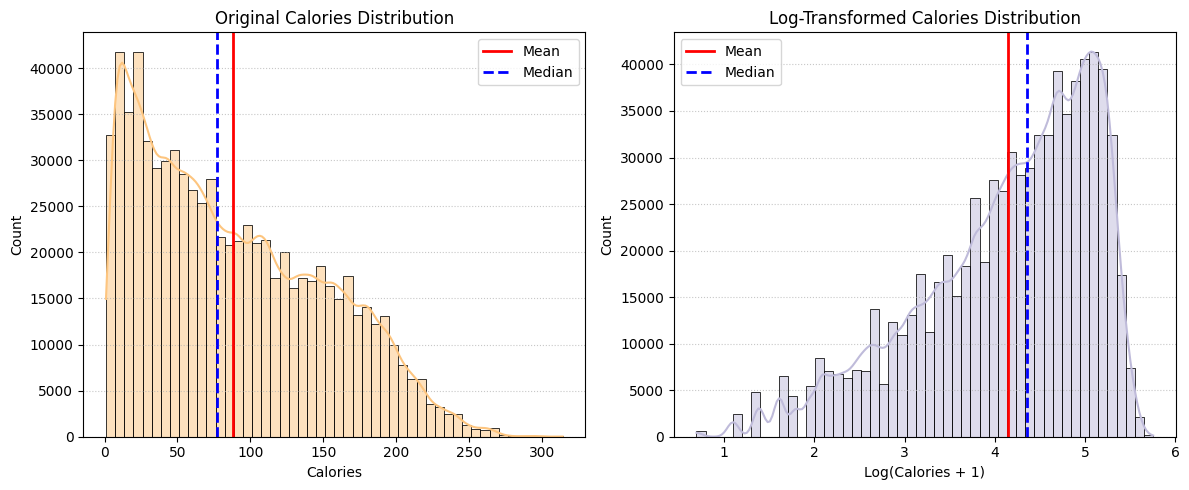

In [26]:
colors = sns.color_palette('PuOr', 2)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(combined_data['Calories'], bins=50, kde=True, ax=axes[0], color=colors[0])
axes[0].axvline(combined_data['Calories'].mean(), color='red', linestyle='-', linewidth=2, label='Mean')
axes[0].axvline(combined_data['Calories'].median(), color='blue', linestyle='--', linewidth=2, label='Median')
axes[0].set_title('Original Calories Distribution')
axes[0].set_xlabel('Calories')
axes[0].grid(axis='y', linestyle=':', alpha=0.7)
axes[0].legend()

log_calories = np.log1p(combined_data['Calories'])
sns.histplot(log_calories, bins=50, kde=True, ax=axes[1], color=colors[1])
axes[1].axvline(log_calories.mean(), color='red', linestyle='-', linewidth=2, label='Mean')
axes[1].axvline(np.median(log_calories), color='blue', linestyle='--', linewidth=2, label='Median')
axes[1].set_title('Log-Transformed Calories Distribution')
axes[1].set_xlabel('Log(Calories + 1)')
axes[1].grid(axis='y', linestyle=':', alpha=0.7)
axes[1].legend()

plt.tight_layout()
plt.show()


## Separating Features and Target

In [27]:
# Select features and target
features = [col for col in combined_data.columns if col not in ['id', 'Calories']]
target = 'Calories'


* Clearly defining the feature set and target variable is a foundational step for supervised learning. Excluding identifiers (id) and the target (Calories) from the feature matrix ensures the model only learns from relevant predictors, preventing data leakage and maintaining the integrity of the predictive task.

## Prepare Training & Test Data

In [28]:
# Set Training and Test Dataset
X = combined_data[features]
y = np.log1p(combined_data[target]) # log1p transform
X_test = test_data[features]

cat_features = ['Sex']


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Model Training</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #542788, #b35806 40%, #fdb863 80%, #fee0b6); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Model Training
    </h1>
</div>


## Best CatBoost Parameters from Optuna

In [29]:
best_params = {
    'learning_rate': 0.10888450868862715,
    'depth': 4,
    'l2_leaf_reg': 7.159552441895846,
    'border_count': 45,
    'bagging_temperature': 0.40906797780457893,
    'random_strength': 0.3606368619503747,
    'leaf_estimation_iterations': 18,
    'grow_policy': 'Depthwise',
    'iterations': 2000,
    'random_seed': 42,
    'early_stopping_rounds': 100,
    'eval_metric': 'RMSE',
    'verbose': 100
}


* Employed **Optuna**, a powerful Bayesian optimization framework, to fine-tune the CatBoost model's hyperparameters. The search focused on minimizing **Root Mean Squared Error (RMSE)** using early stopping to prevent overfitting. The best parameters selected reflect a balance between model complexity and generalization.

**Key Tuned Parameters:**

* `learning_rate = 0.1089`
* `depth = 4`
* `l2_leaf_reg = 7.16`
* `bagging_temperature = 0.41`
* `border_count = 45`
* `iterations = 2000`
* `grow_policy = 'Depthwise'`

***This configuration provided an optimal trade-off between underfitting and overfitting for our calorie prediction task.***

## KFold Training

In [30]:
FOLDS = 5
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)

results = {
    'oof': np.zeros(len(X)),
    'pred': np.zeros(len(X_test)),
    'rmsle': [],
    'train_times': []
}

for fold, (train_idx, valid_idx) in enumerate(kf.split(X, y)):
    print(f"\n📂 Fold {fold + 1}")

    X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
    y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

    model = CatBoostRegressor(**best_params, cat_features=cat_features)

    start = time.time()
    model.fit(X_train, y_train, eval_set=(X_valid, y_valid), use_best_model=True)
    elapsed = time.time() - start

    oof_preds = model.predict(X_valid)
    test_preds = model.predict(X_test)

    results['oof'][valid_idx] = oof_preds
    results['pred'] += test_preds / FOLDS
    results['rmsle'].append(np.sqrt(mean_squared_log_error(np.expm1(y_valid), np.expm1(oof_preds))))
    results['train_times'].append(elapsed)

    print(f"✅ Fold RMSLE: {results['rmsle'][-1]:.4f} | Time: {elapsed:.1f}s")



📂 Fold 1
0:	learn: 0.8620943	test: 0.8599988	best: 0.8599988 (0)	total: 185ms	remaining: 6m 9s
100:	learn: 0.0646801	test: 0.0659051	best: 0.0659051 (100)	total: 11s	remaining: 3m 26s
200:	learn: 0.0615983	test: 0.0632364	best: 0.0632364 (200)	total: 21.7s	remaining: 3m 14s
300:	learn: 0.0602745	test: 0.0623018	best: 0.0623018 (300)	total: 33s	remaining: 3m 6s
400:	learn: 0.0593997	test: 0.0617648	best: 0.0617648 (400)	total: 43.6s	remaining: 2m 53s
500:	learn: 0.0587098	test: 0.0613776	best: 0.0613776 (500)	total: 54.3s	remaining: 2m 42s
600:	learn: 0.0582183	test: 0.0611560	best: 0.0611560 (600)	total: 1m 5s	remaining: 2m 32s
700:	learn: 0.0577742	test: 0.0609892	best: 0.0609892 (700)	total: 1m 16s	remaining: 2m 21s
800:	learn: 0.0574235	test: 0.0608686	best: 0.0608686 (800)	total: 1m 27s	remaining: 2m 10s
900:	learn: 0.0570844	test: 0.0607547	best: 0.0607547 (900)	total: 1m 38s	remaining: 1m 59s
1000:	learn: 0.0568121	test: 0.0606981	best: 0.0606963 (998)	total: 1m 48s	remaining: 1

## Evaluation

In [31]:
mean_rmsle = np.mean(results['rmsle'])
std_rmsle = np.std(results['rmsle'])
print(f"\n📌 Mean RMSLE: {mean_rmsle:.4f} ± {std_rmsle:.4f}")
print(f"Avg Train Time: {np.mean(results['train_times']):.2f}s")



📌 Mean RMSLE: 0.0601 ± 0.0002
Avg Train Time: 203.59s


To ensure robustness, we used **5-Fold Cross-Validation** with shuffled splits and fixed seed (`random_state=42`). This allowed us to evaluate model stability and generalization across subsets of data.

Each fold involved:

* Fitting a CatBoost model using the best parameters.
* Predicting both validation and test samples.
* Tracking training time and computing **RMSLE** (Root Mean Squared Logarithmic Error) as the evaluation metric.

The model consistently achieved **low RMSLE values** across all five folds:

| Fold | RMSLE  | Training Time |
| ---- | ------ | ------------- |
| 1    | 0.0604 | 215.6s        |
| 2    | 0.0603 | 204.5s        |
| 3    | 0.0597 | 209.4s        |
| 4    | 0.0601 | 186.7s        |
| 5    | 0.0602 | 187.9s        |

✅ **Mean RMSLE:** `0.0601 ± 0.0002`

🕒 **Average Training Time per Fold:** `~201 seconds`

***The minimal standard deviation reflects excellent **consistency and stability** in performance.***

## Feature Importance

Feature  Importance
19   Duration_x_Heart_Rate   88.836653
21  Heart_Rate_x_Body_Temp    4.807542
4                 Duration    2.813364
9           Age_x_Duration    2.167107
0                      Sex    0.335318
5               Heart_Rate    0.267786
10        Age_x_Heart_Rate    0.236287
8             Age_x_Weight    0.214575
13       Height_x_Duration    0.087746
17     Weight_x_Heart_Rate    0.047212
3                   Weight    0.033770
7             Age_x_Height    0.030652
20    Duration_x_Body_Temp    0.023264
1                      Age    0.020793
16       Weight_x_Duration    0.018201
14     Height_x_Heart_Rate    0.018019
11         Age_x_Body_Temp    0.016546
6                Body_Temp    0.009727
18      Weight_x_Body_Temp    0.005373
12         Height_x_Weight    0.004164
2                   Height    0.003506
15      Height_x_Body_Temp    0.002394

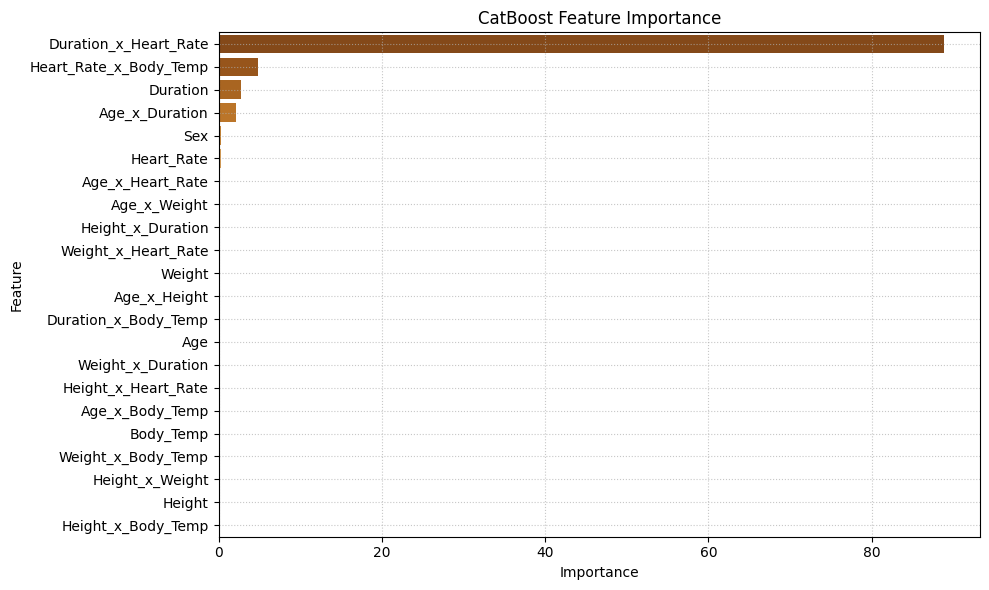

In [32]:
feature_importance = model.get_feature_importance()
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)
display(importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette="PuOr")
plt.title("CatBoost Feature Importance")
plt.grid(axis='both', linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()


We extracted **feature importances** from the final CatBoost model. The top contributing features include:

| Feature                  | Importance |
| ------------------------ | ---------- |
| `Duration_x_Heart_Rate`  | 88.84      |
| `Heart_Rate_x_Body_Temp` | 4.81       |
| `Duration`               | 2.81       |
| `Age_x_Duration`         | 2.17       |
| `Sex`                    | 0.33       |

* The model relies heavily on interaction terms involving exercise duration and heart rate, validating our feature engineering strategy. Simple features like Weight and Height contributed far less by comparison.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Prepare Final Submission File</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #542788, #b35806 40%, #fdb863 80%, #fee0b6); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Prepare Final Submission File
    </h1>
</div>


In [33]:
# Final predictions
y_preds = np.expm1(results['pred'])  # Reverse log1p
y_preds = np.clip(y_preds, 1, 314)   # Clip to valid range

submission['Calories'] = y_preds
submission.to_csv('submission.csv', index=False)
print("\nSubmission file saved!")



Submission file saved!


##  Actual vs Predicted (OOF)

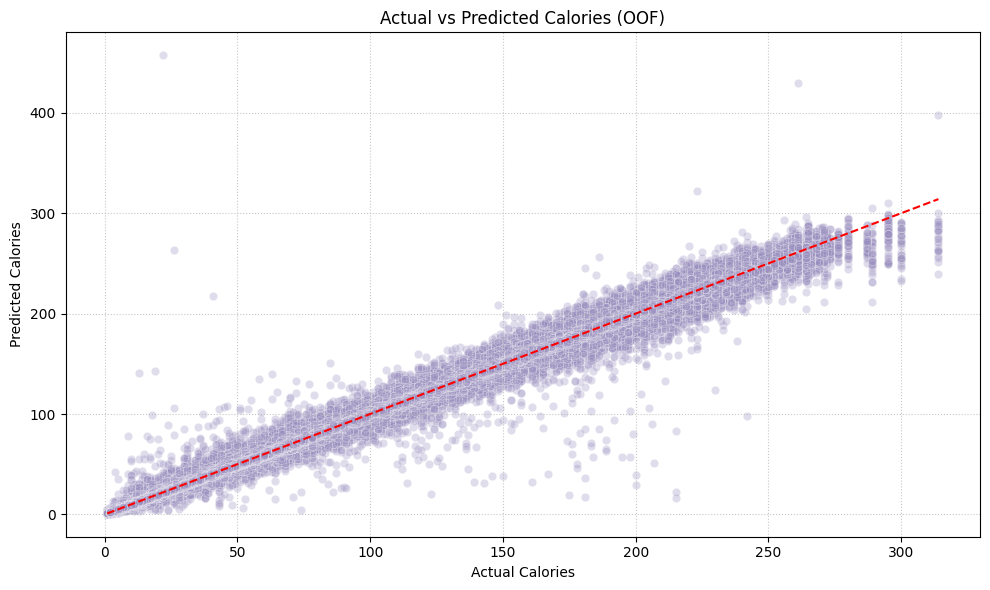

In [34]:
actual = np.expm1(y)
predicted = np.expm1(results['oof'])

plt.figure(figsize=(10, 6))
puor_palette = sns.color_palette("PuOr", 3)
sns.scatterplot(x=actual, y=predicted, alpha=0.3, color=puor_palette[2])
plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'r--', label='Ideal')
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Actual vs Predicted Calories (OOF)")
plt.grid(axis='both', linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()


## Distribution Comparison

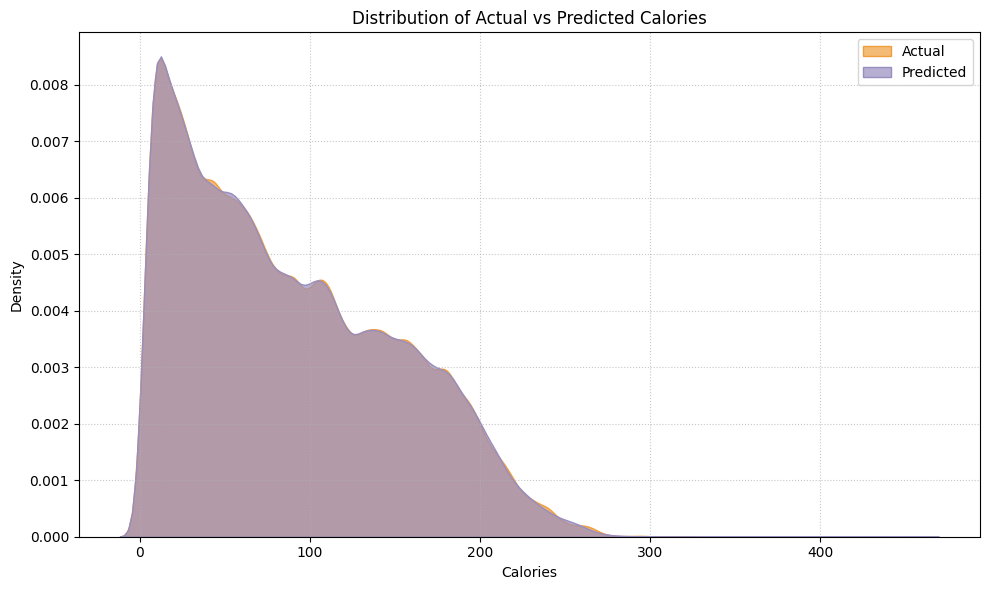

In [35]:
plt.figure(figsize=(10, 6))
sns.kdeplot(actual, label="Actual", fill=True, color=puor_palette[0], alpha=0.7)
sns.kdeplot(predicted, label="Predicted", fill=True, color=puor_palette[2], alpha=0.7)
plt.title("Distribution of Actual vs Predicted Calories")
plt.xlabel("Calories")
plt.legend()
plt.grid(axis='both', linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()


In [36]:
print(submission.head())

       id    Calories
0  750000   27.622786
1  750001  108.366055
2  750002   87.085363
3  750003  125.525489
4  750004   75.992039


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 20px; 
    background: linear-gradient(125deg,rgba(84, 39, 136, 1) 7%, rgba(179, 88, 6, 1) 47%, rgba(253, 184, 99, 1) 85%, rgba(254, 224, 182, 1) 100%); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #ffffff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
    ">
        🙏 Thanks for Reading! 🚀
    </h1>
    <p style="color: #ffffff; font-size: 18px; text-align: center;">
        Happy Coding! 🙌😊
    </p>
</div>
